In [65]:
import numpy as np
import pandas as pd
from google.colab import files
data=files.upload()

Saving Unemployment in India.csv to Unemployment in India (1).csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020 (1).csv


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [68]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [69]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [70]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [71]:
df.shape

(267, 9)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [73]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [74]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [75]:
df['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [76]:
rg=df.groupby(['Region','Region.1']).mean()[' Estimated Unemployment Rate (%)'].reset_index() #state wise estimated unemployement rate

<ipython-input-76-725998345b9c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [77]:
rg

,Region,Region.1,Estimated Unemployment Rate (%)
0,Andhra Pradesh,South,8.664000
1,Assam,Northeast,4.856000
2,Bihar,East,19.471000
3,Chhattisgarh,West,7.819000
4,Delhi,North,18.414000
5,Goa,West,12.167000
6,Gujarat,West,6.376000
7,Haryana,North,27.477000
8,Himachal Pradesh,North,16.065000
9,Jammu & Kashmir,North,16.477778


In [78]:
x=rg.groupby(['Region.1']).mean()[' Estimated Unemployment Rate (%)'].reset_index() #direction wise average estimated unemployement rate

<ipython-input-78-b6b7b8b36f36>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [79]:
x

,Region.1,Estimated Unemployment Rate (%)
0,East,13.916000
1,North,15.896972
2,Northeast,10.892375
3,South,10.454667
4,West,8.239000


In [80]:
for i in df.columns:
  print(i,df[i].nunique())
  print()

Region 27

 Date 10

 Frequency 1

 Estimated Unemployment Rate (%) 252

 Estimated Employed 267

 Estimated Labour Participation Rate (%) 248

Region.1 5

longitude 27

latitude 24



In [81]:
for i in df.columns:
  print(i,df[i].unique())
  print()

Region ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

 Date [' 31-01-2020' ' 29-02-2020' ' 31-03-2020' ' 30-04-2020' ' 31-05-2020'
 ' 30-06-2020' ' 31-07-2020' ' 31-08-2020' ' 30-09-2020' ' 31-10-2020']

 Frequency [' M']

 Estimated Unemployment Rate (%) [ 5.48  5.83  5.79 20.51 17.43  3.31  8.34  6.96  6.4   6.59  4.66  4.41
  4.77 11.06  9.55  0.6   3.77  5.53  1.19  3.02 10.61 10.29 15.43 46.64
 45.96 17.82 12.79 13.44 11.91  9.82  9.65  8.38  7.54  3.41 10.5  14.23
 10.27  5.63  1.96  6.62 22.23 14.84 17.04 16.68 42.27 18.19 20.3  13.79
 12.53  6.27  8.89  2.81  5.25 13.31 21.25  9.96 17.07 16.21 15.38 11.54
  5.54  6.38  6.66 18.71 12.11  3.2   1.84  1.87  3.42  4.03 20.34 25.77
 25.05 43.22 29.02 2

In [82]:
print(df.value_counts())


Region            Date         Frequency   Estimated Unemployment Rate (%)   Estimated Employed   Estimated Labour Participation Rate (%)  Region.1  longitude  latitude
Andhra Pradesh    29-02-2020   M          5.83                              16545652             40.90                                     South     15.9129    79.7400     1
Punjab            31-01-2020   M          11.11                             9442093              42.82                                     North     31.1471    75.3412     1
Puducherry        29-02-2020   M          1.76                              493961               40.80                                     South     11.9416    79.8083     1
                  30-04-2020   M          75.85                             117542               39.30                                     South     11.9416    79.8083     1
                  30-06-2020   M          4.24                              367135               30.80                                 

In [83]:
df.duplicated().sum()

0

In [84]:
x.columns

Index(['Region.1', ' Estimated Unemployment Rate (%)'], dtype='object')

In [85]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [86]:
df.columns

Index(['State', ' Date', ' Frequency', 'EUR', 'EE', 'ELPR', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [87]:
region_stats = df.groupby(['Region'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,EUR,EE,ELPR
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


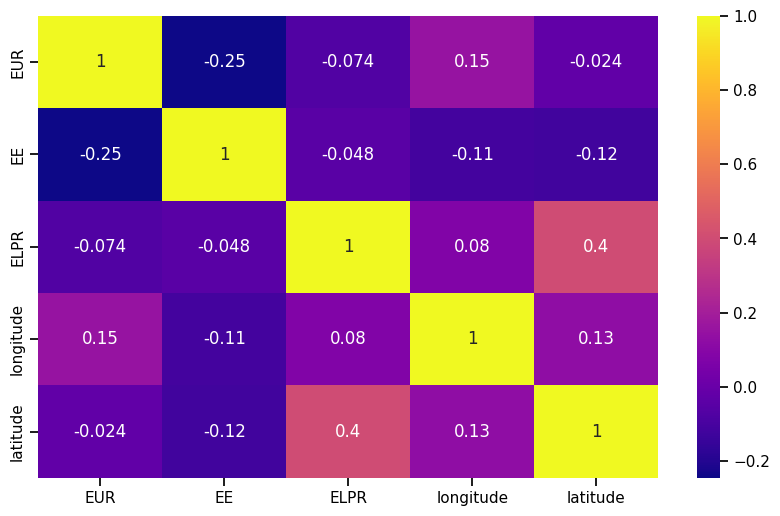

In [88]:
heat_maps = df[['EUR','EE', 'ELPR','longitude', 'latitude']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='plasma');

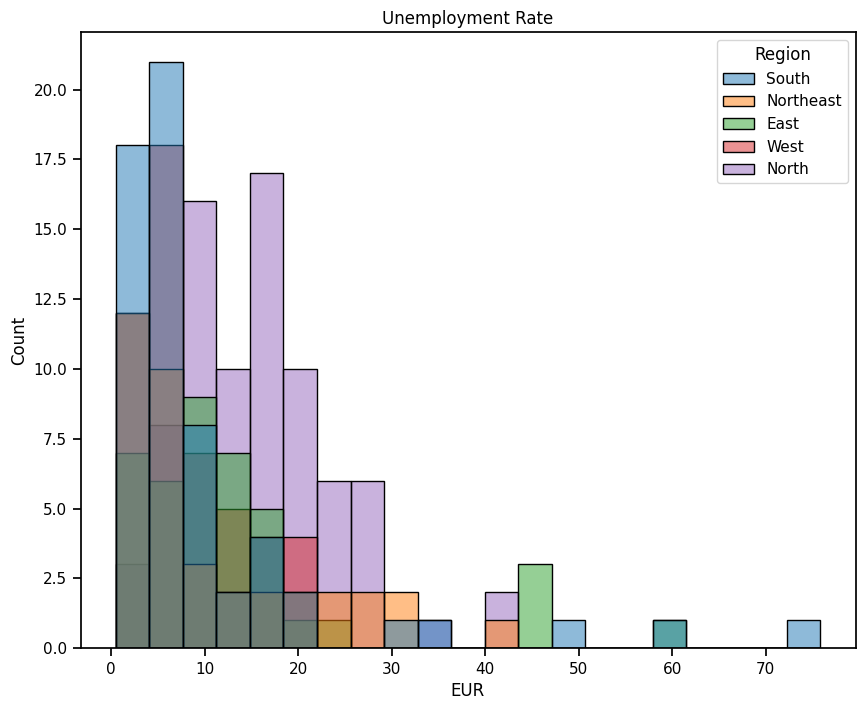

In [89]:
df.columns= ["State","Date","Frequency","EUR","EE","ELPR","Region","longitude","latitude"]
plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

In [90]:
import plotly.express as px

In [91]:
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()
fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [92]:
unemployment = df[["State", "Region", "EUR"]]
fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',title= 'Unemployment rate in every State and Region', height=650)
fig.show()

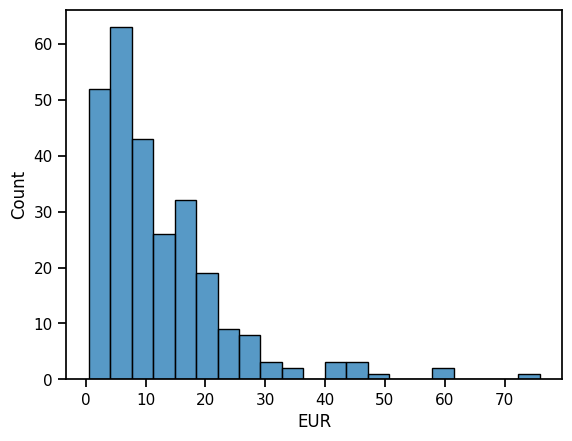

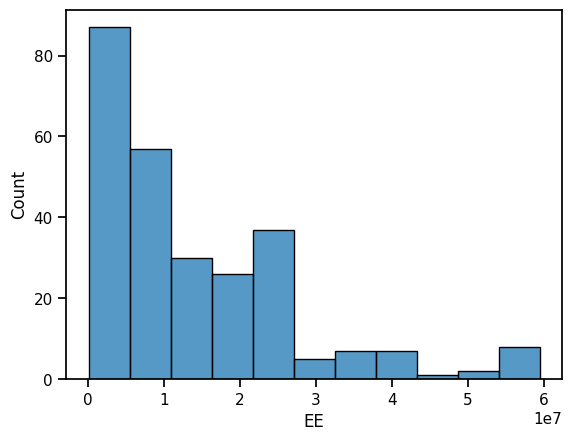

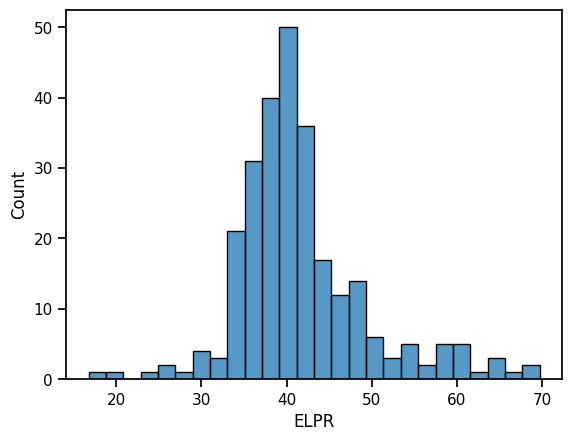

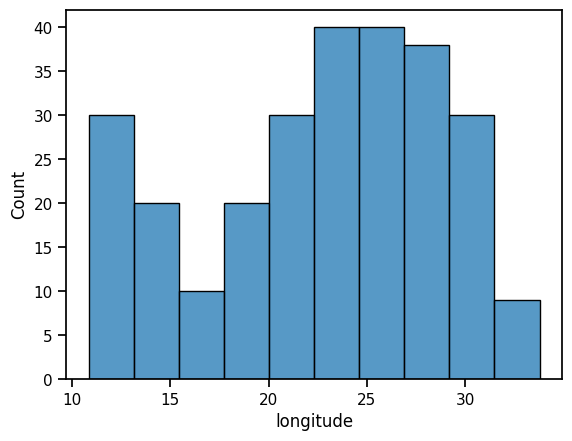

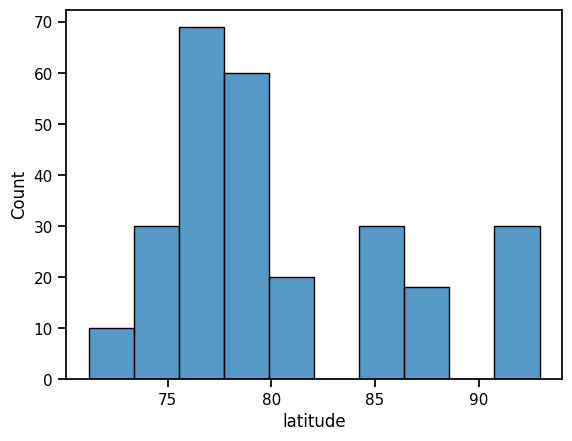

In [93]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

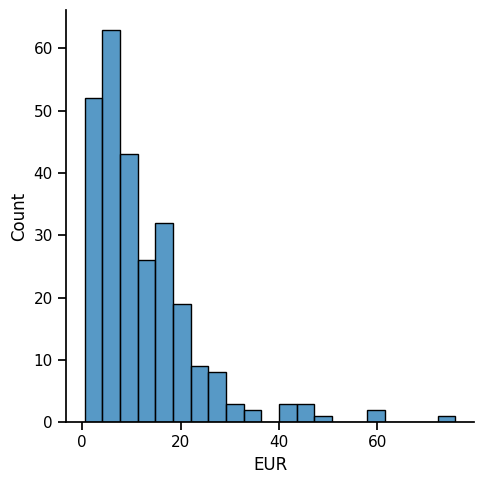

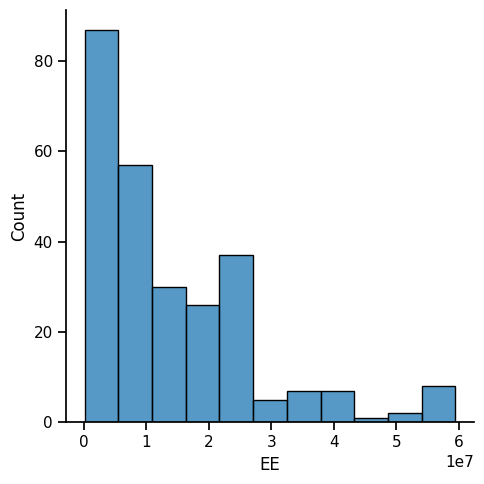

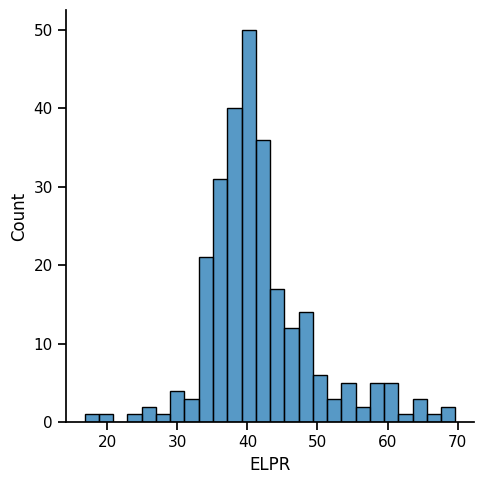

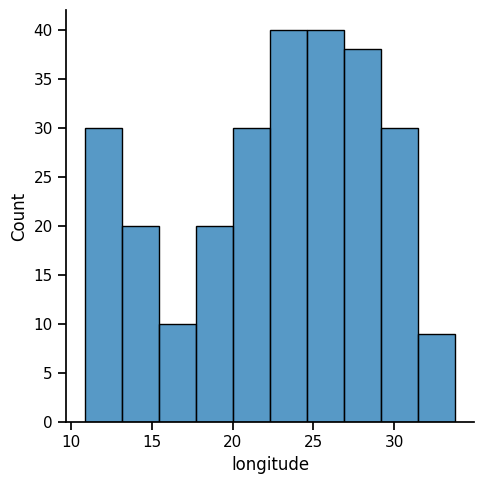

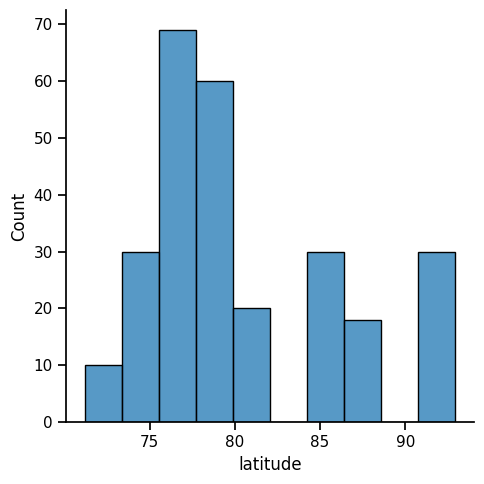

In [94]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.displot(x=df[i])
        plt.show();

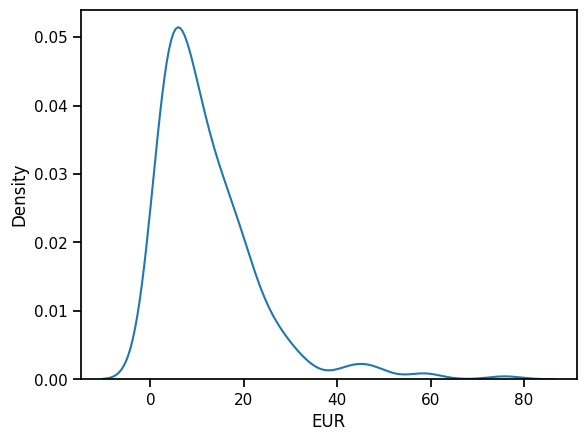

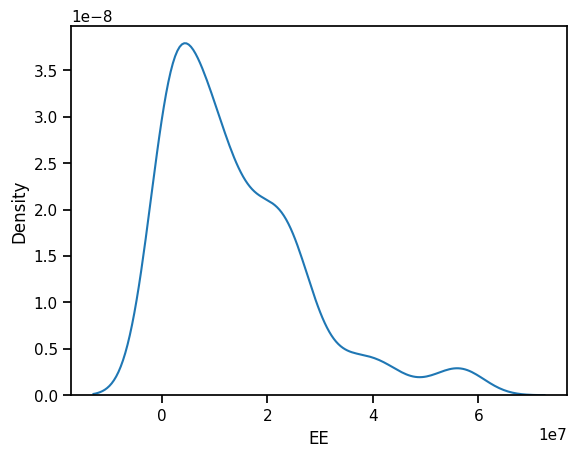

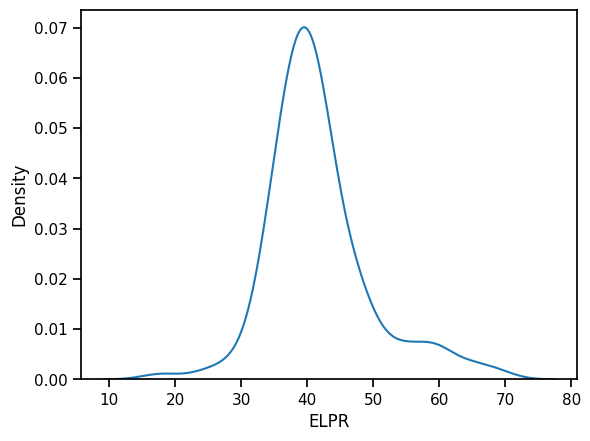

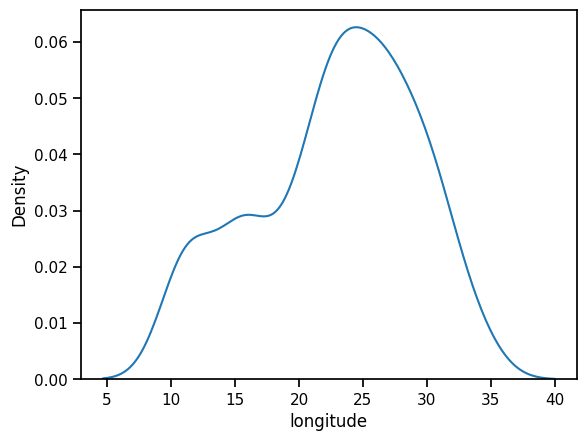

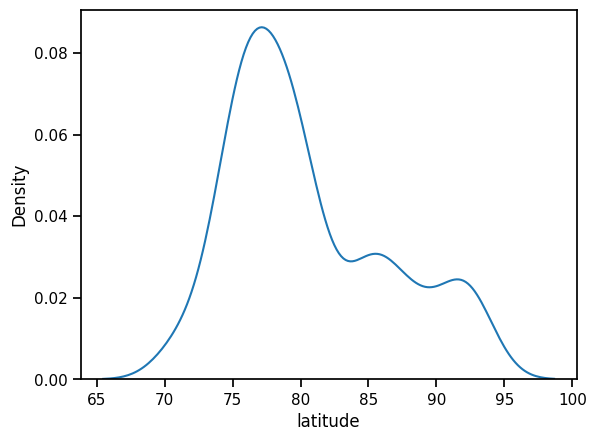

In [95]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

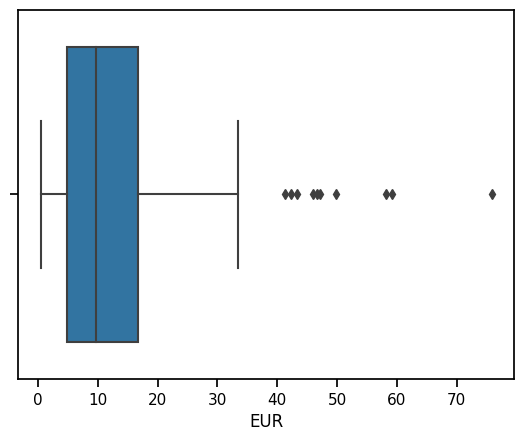

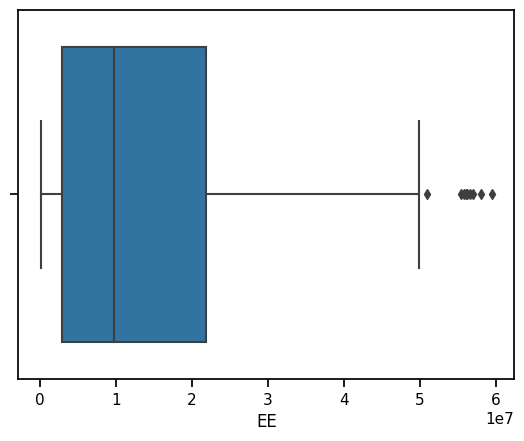

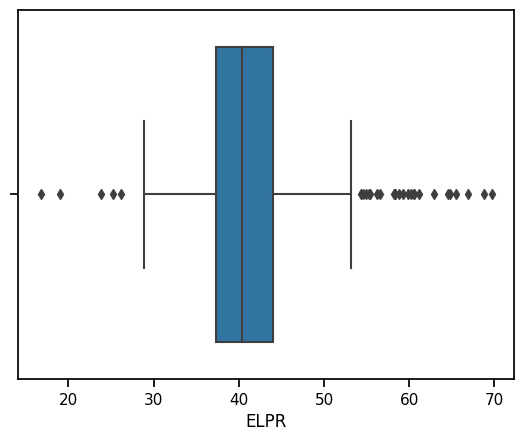

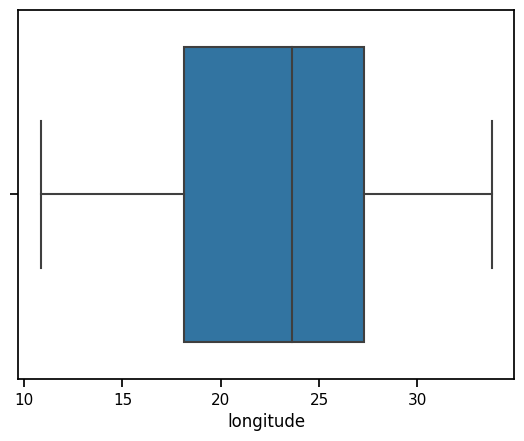

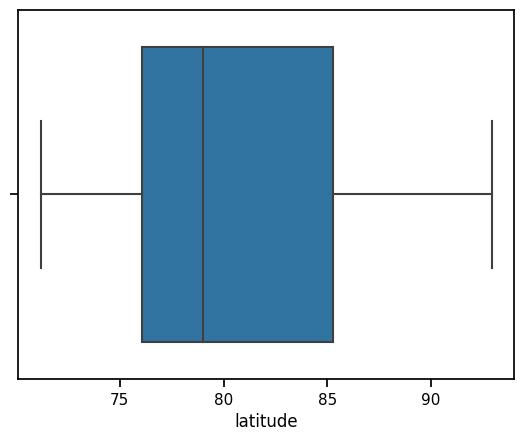

In [96]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(x=df[i])
        plt.show();

In [97]:
df.columns

Index(['State', 'Date', 'Frequency', 'EUR', 'EE', 'ELPR', 'Region',
       'longitude', 'latitude'],
      dtype='object')

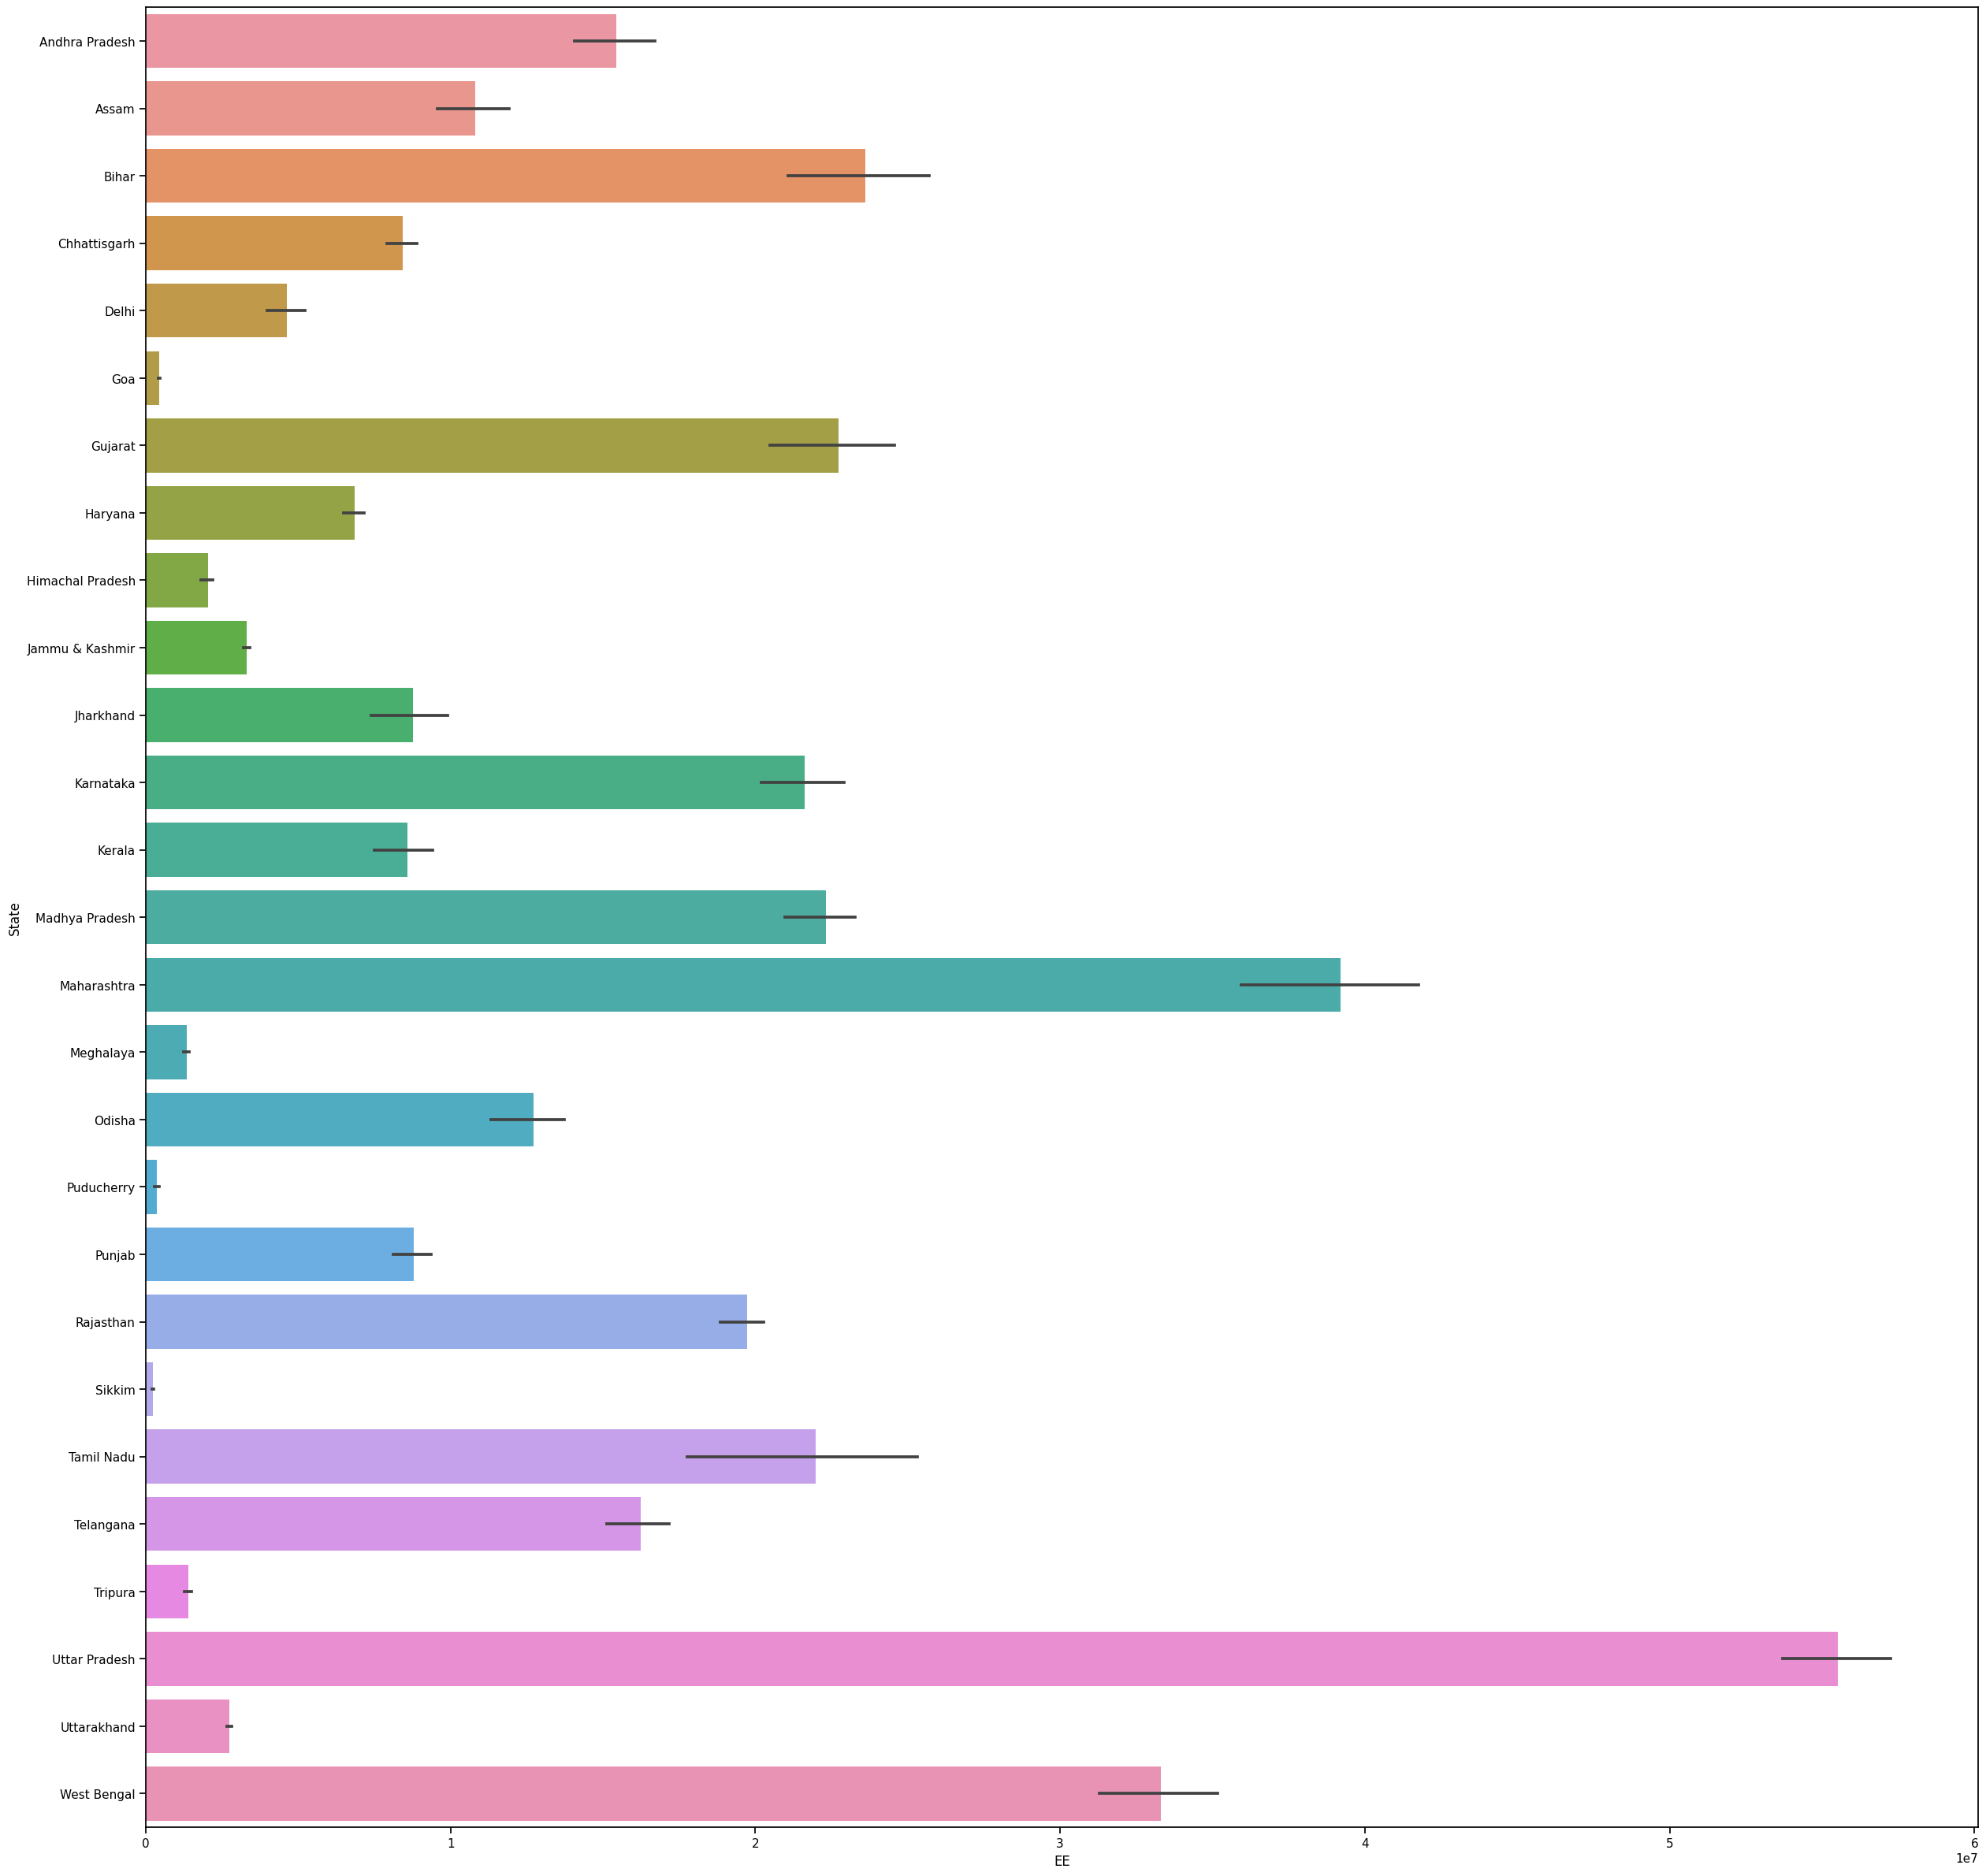

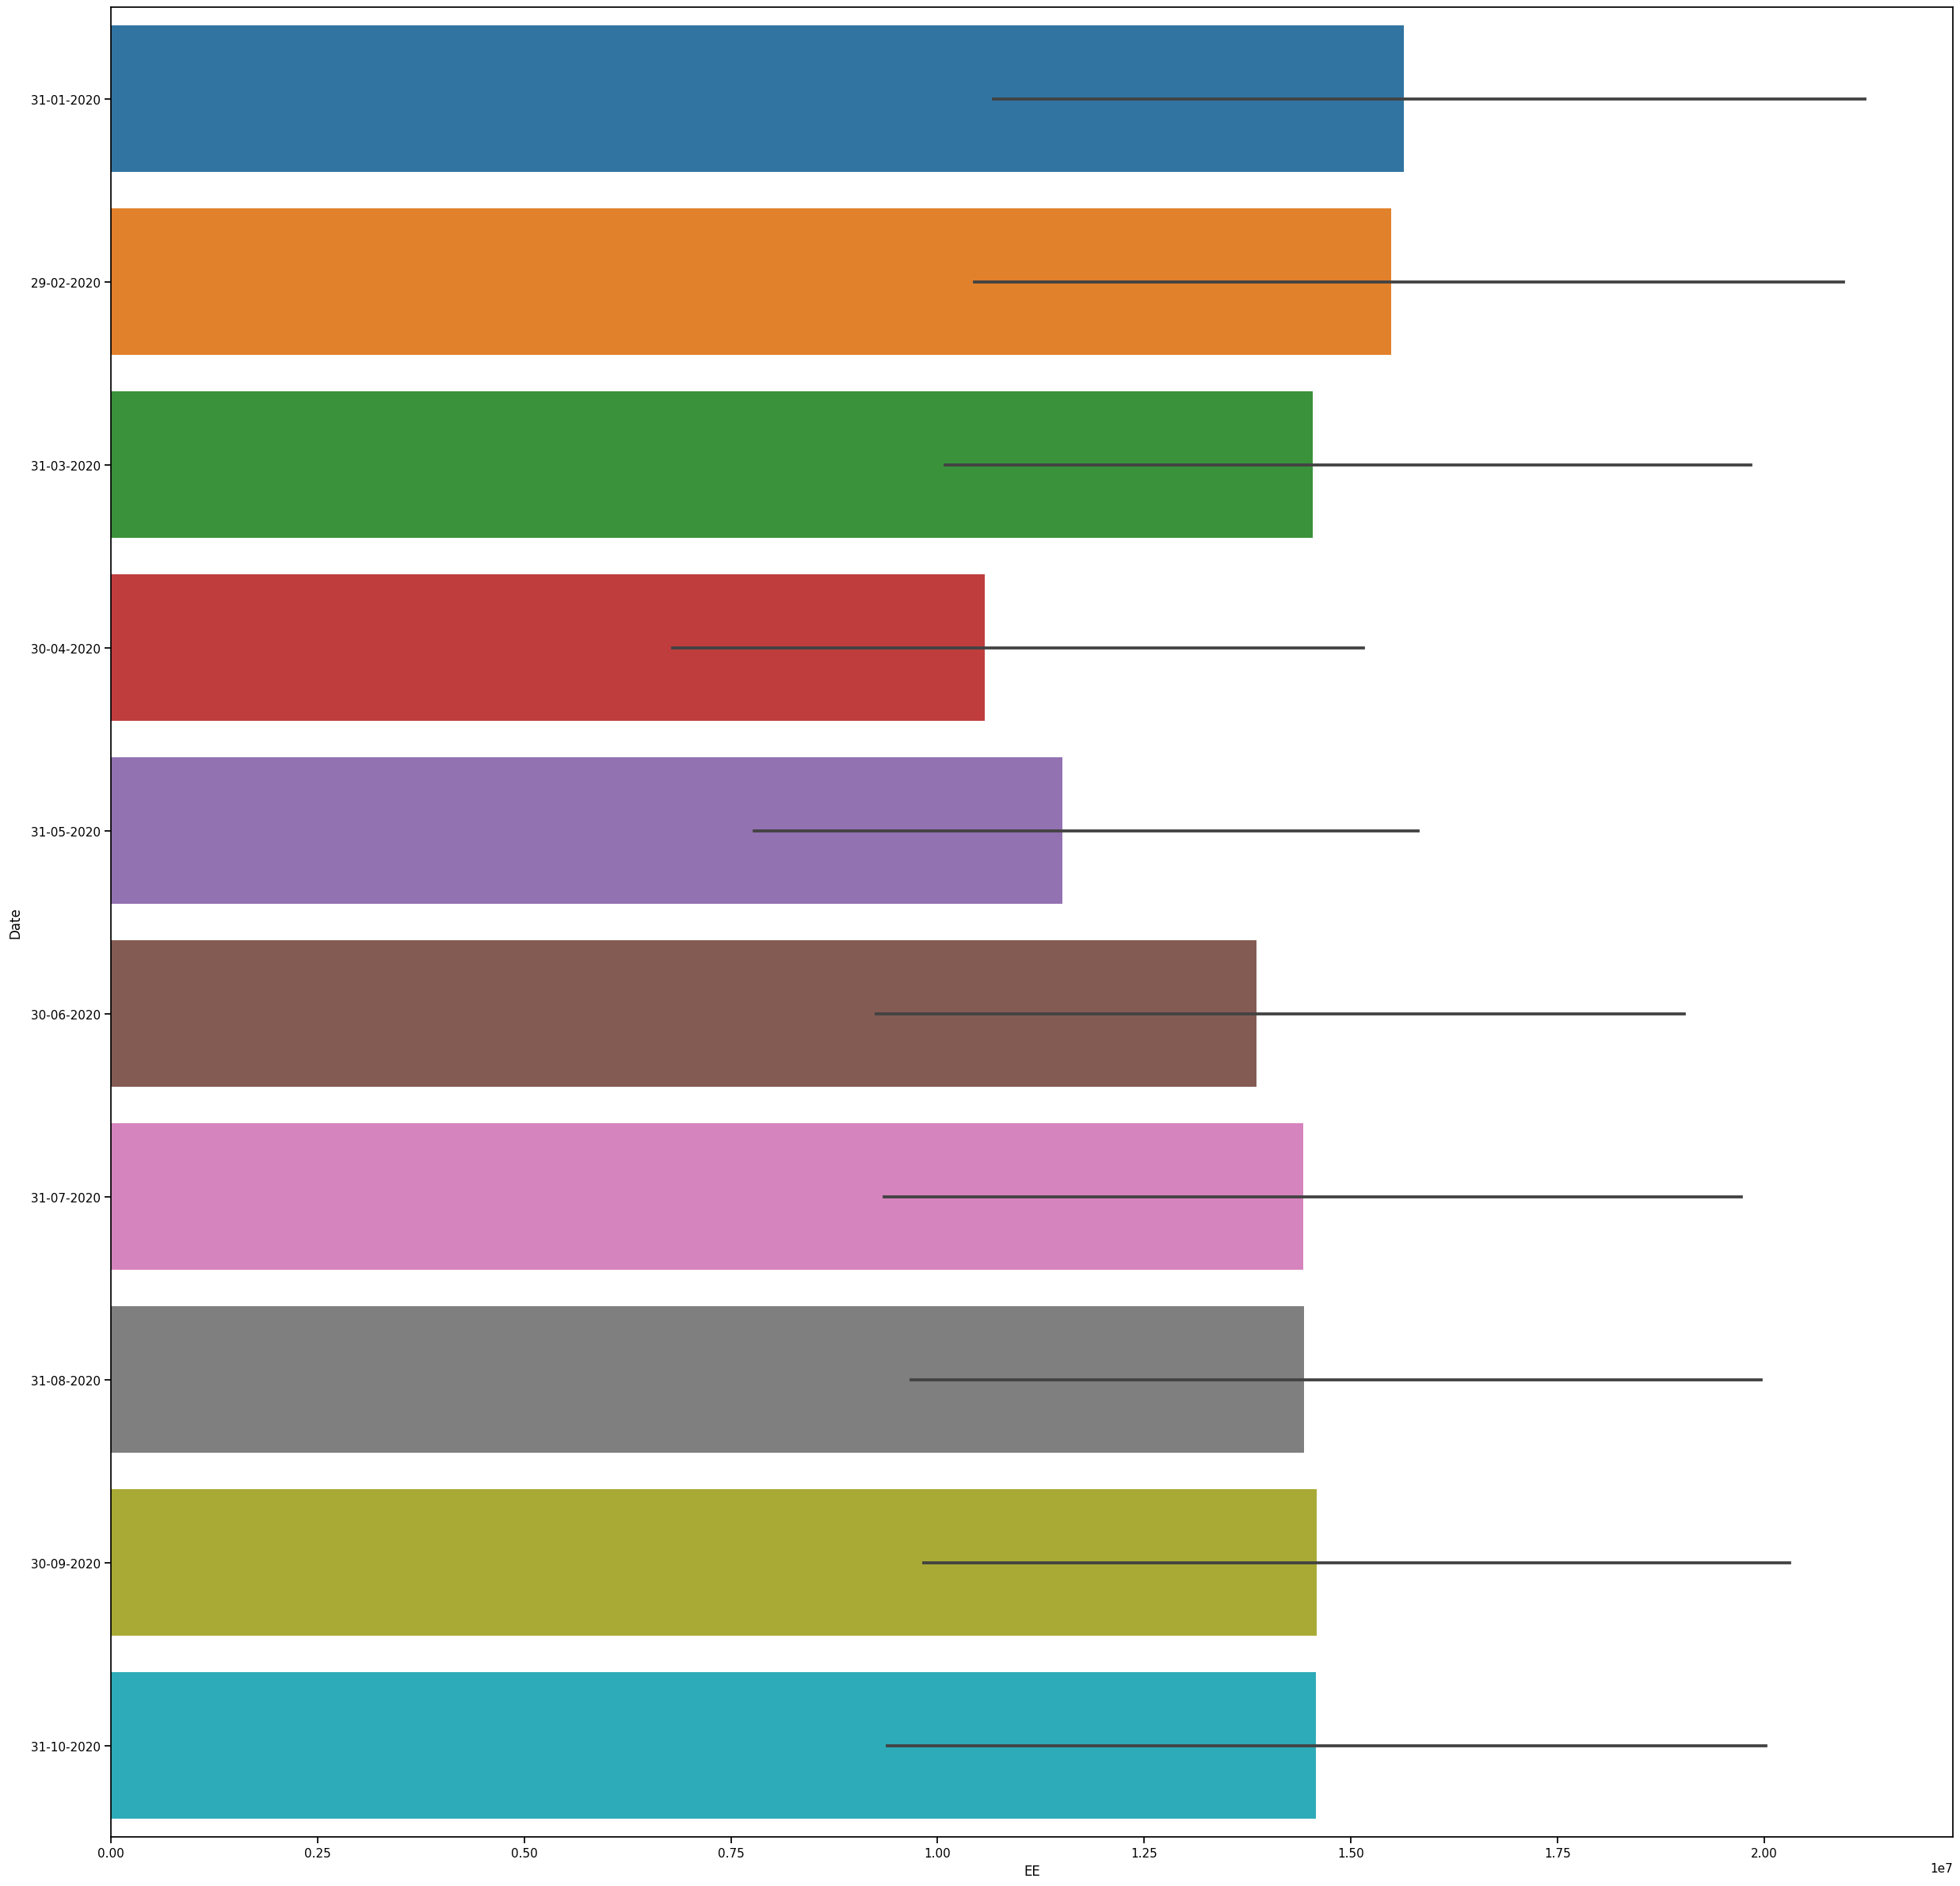

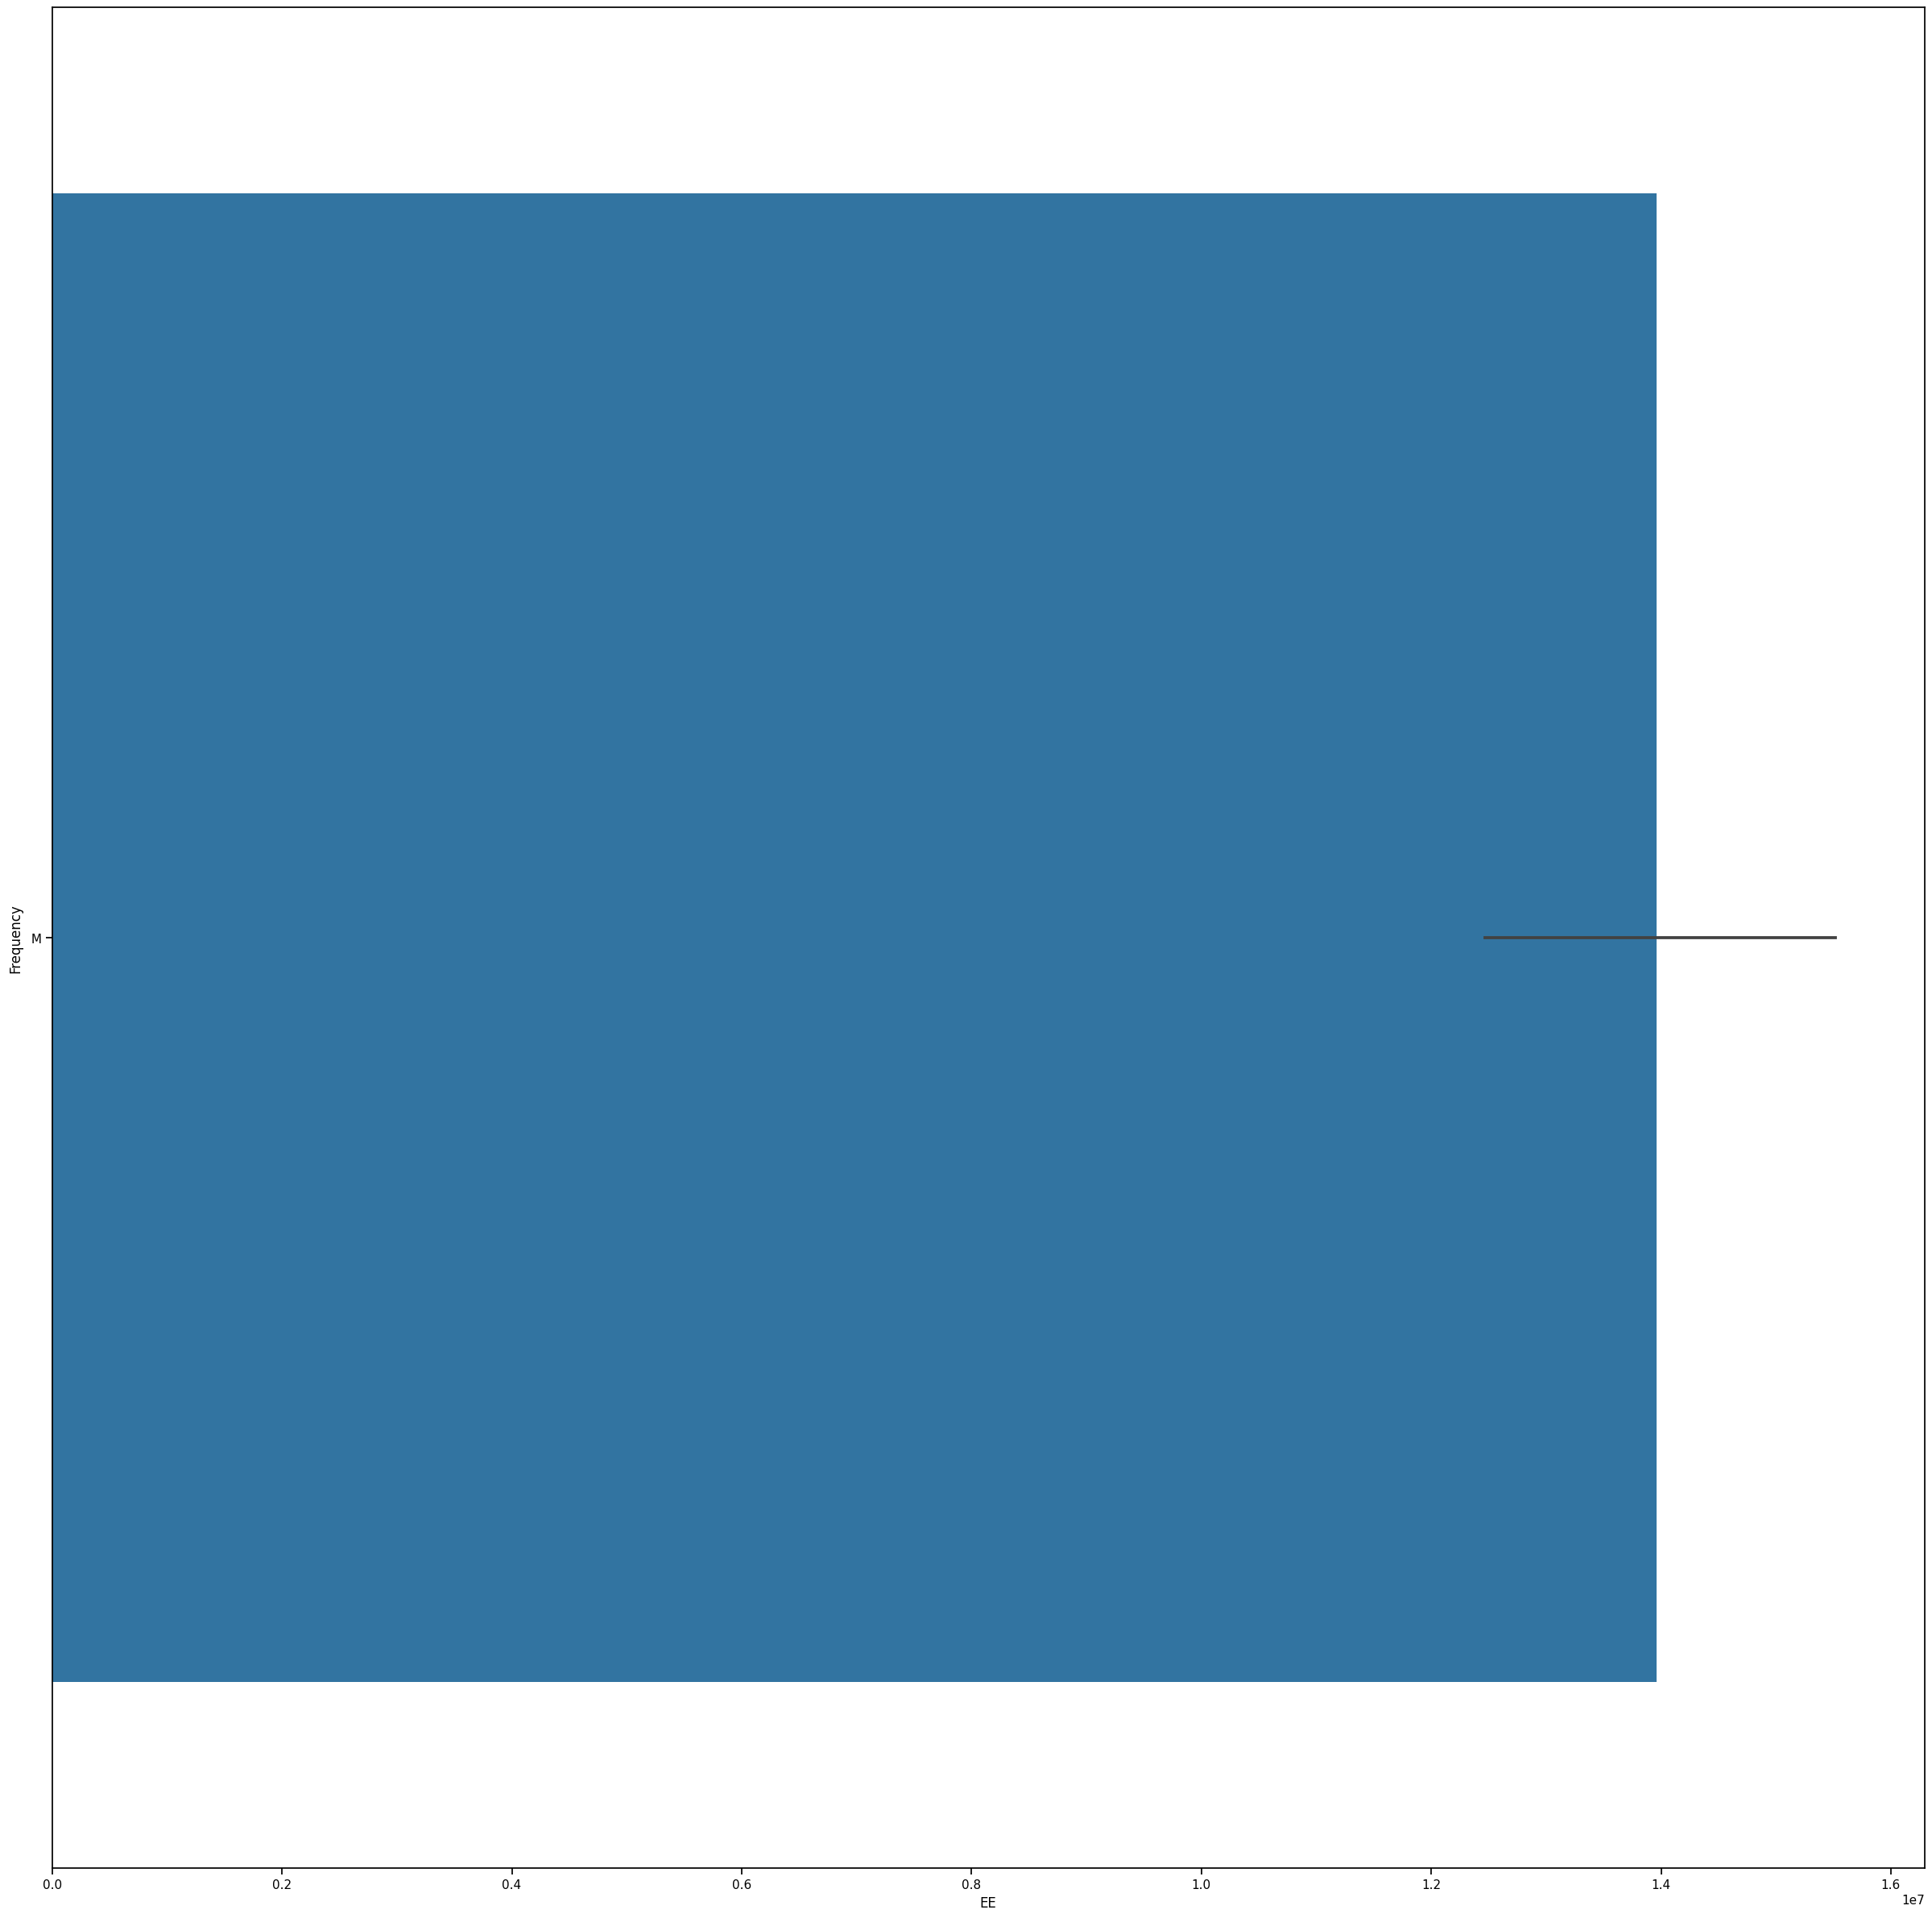

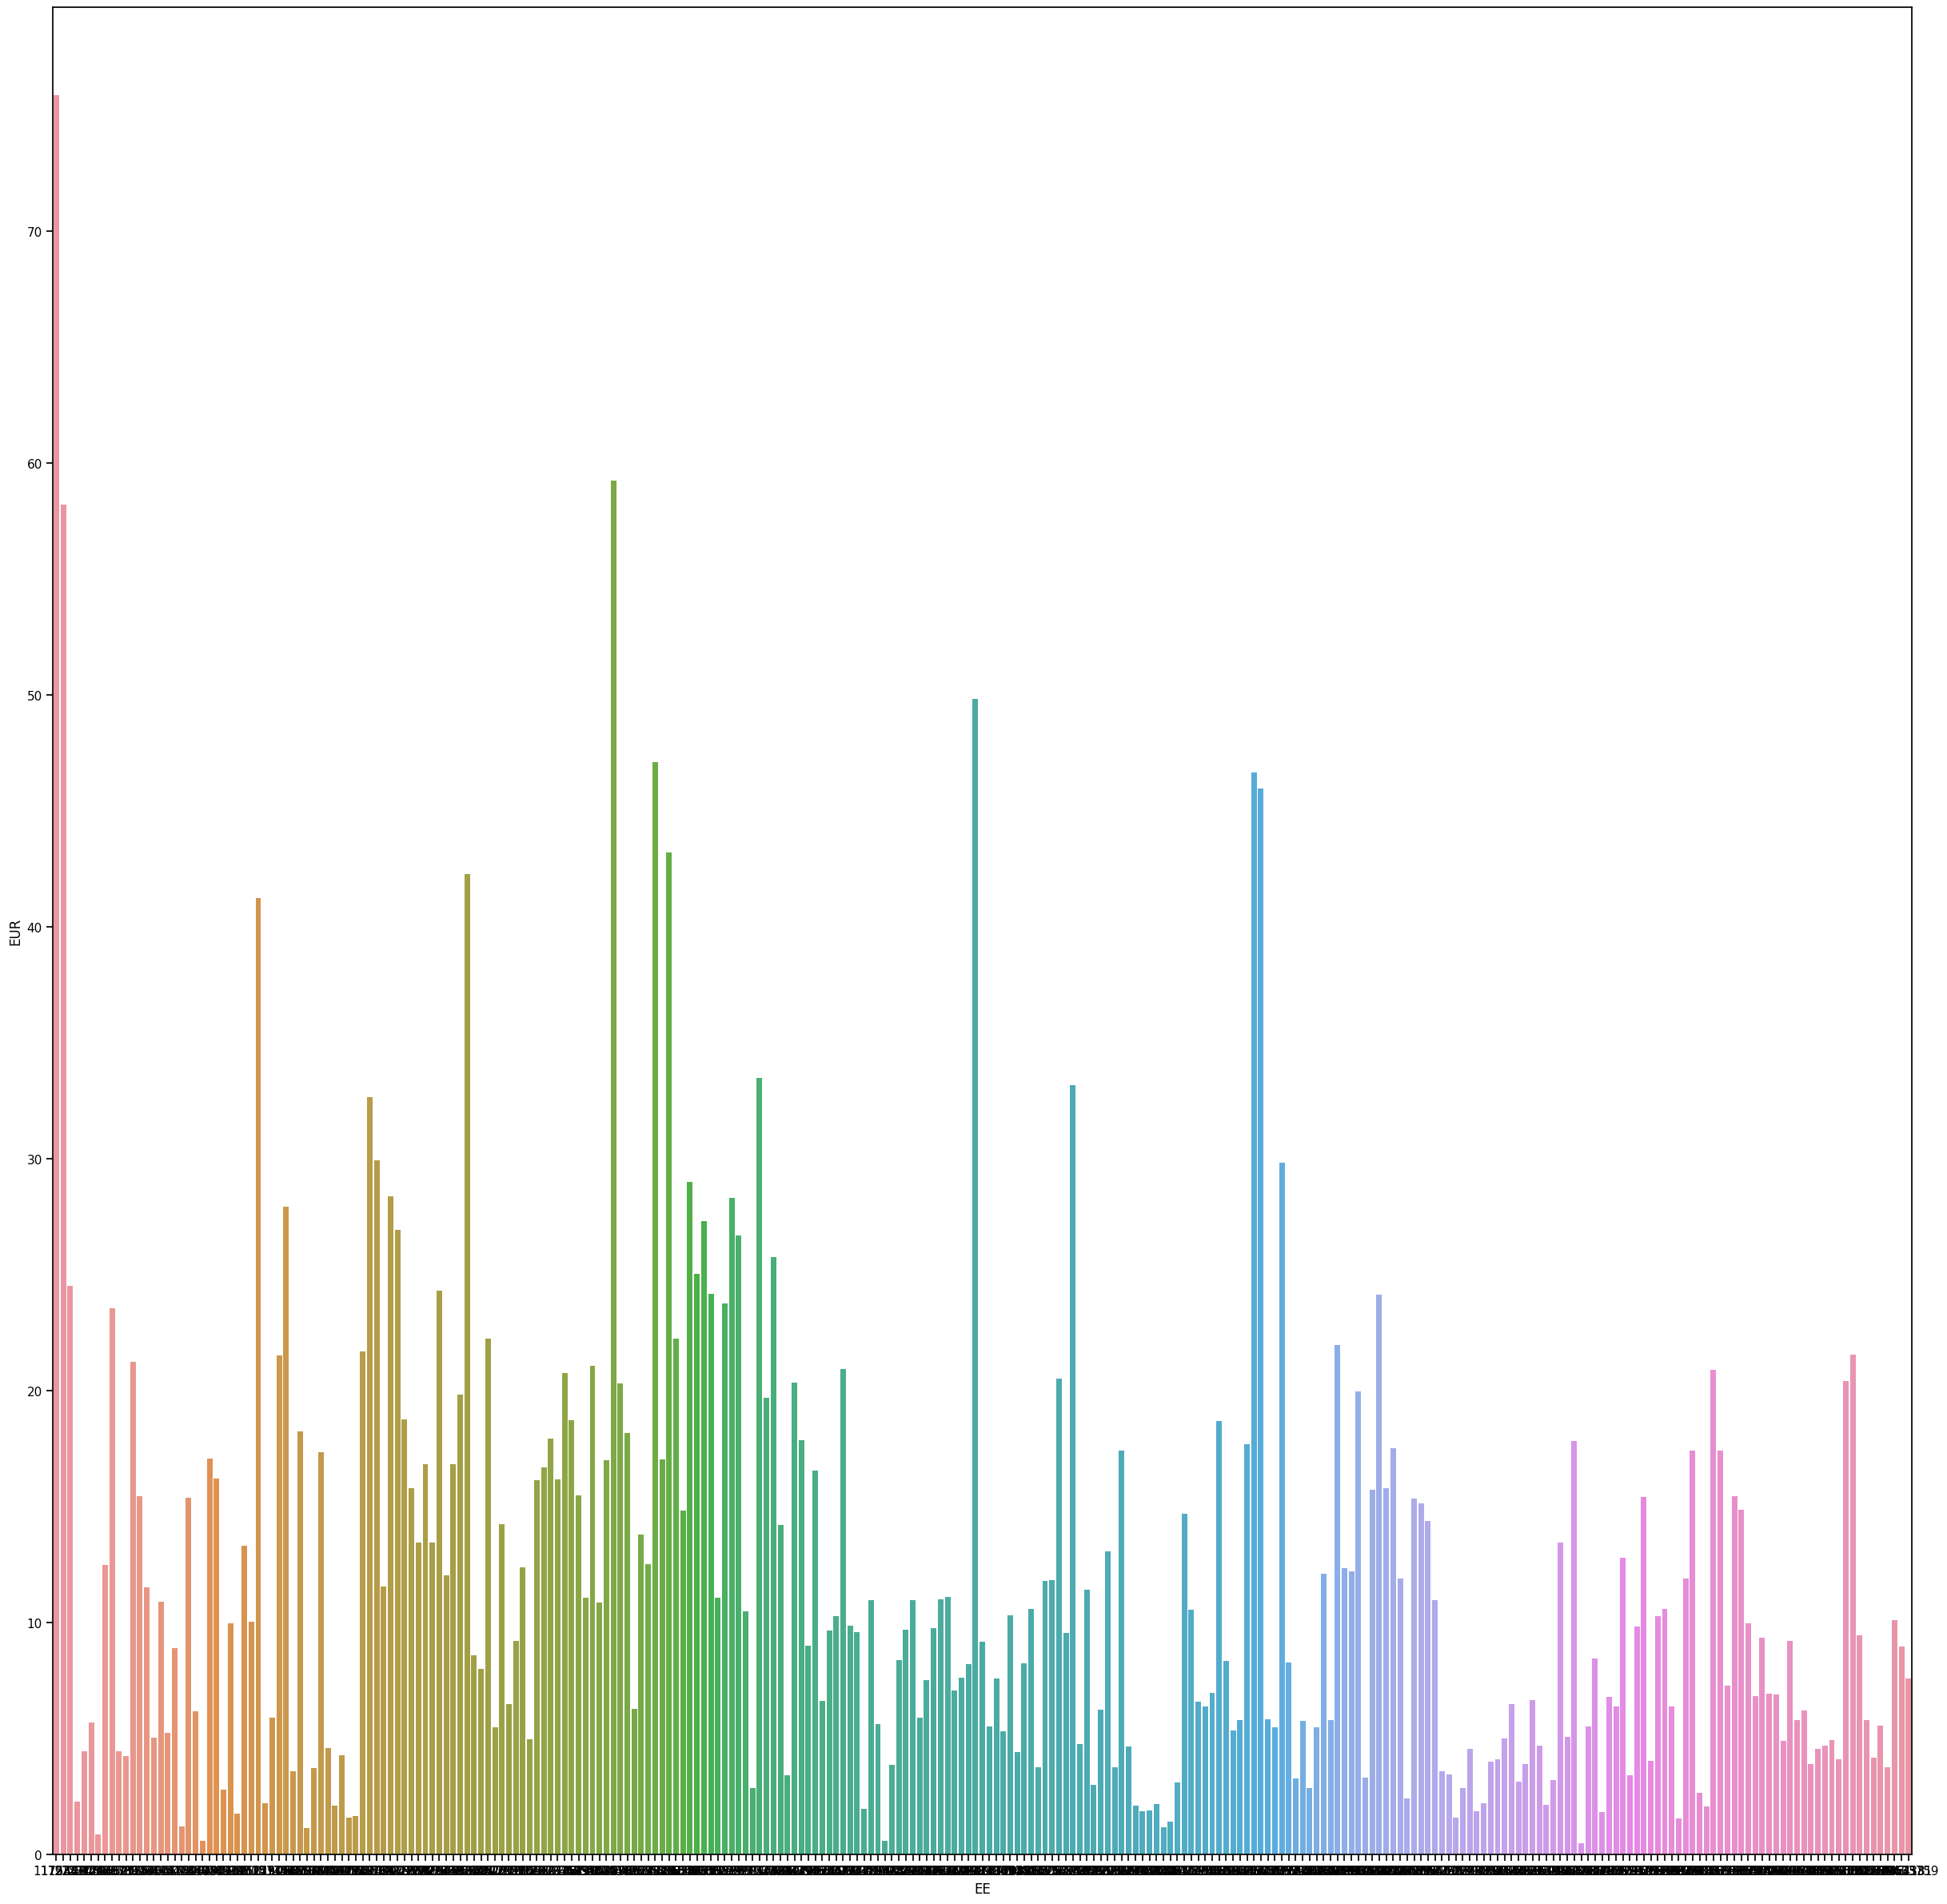

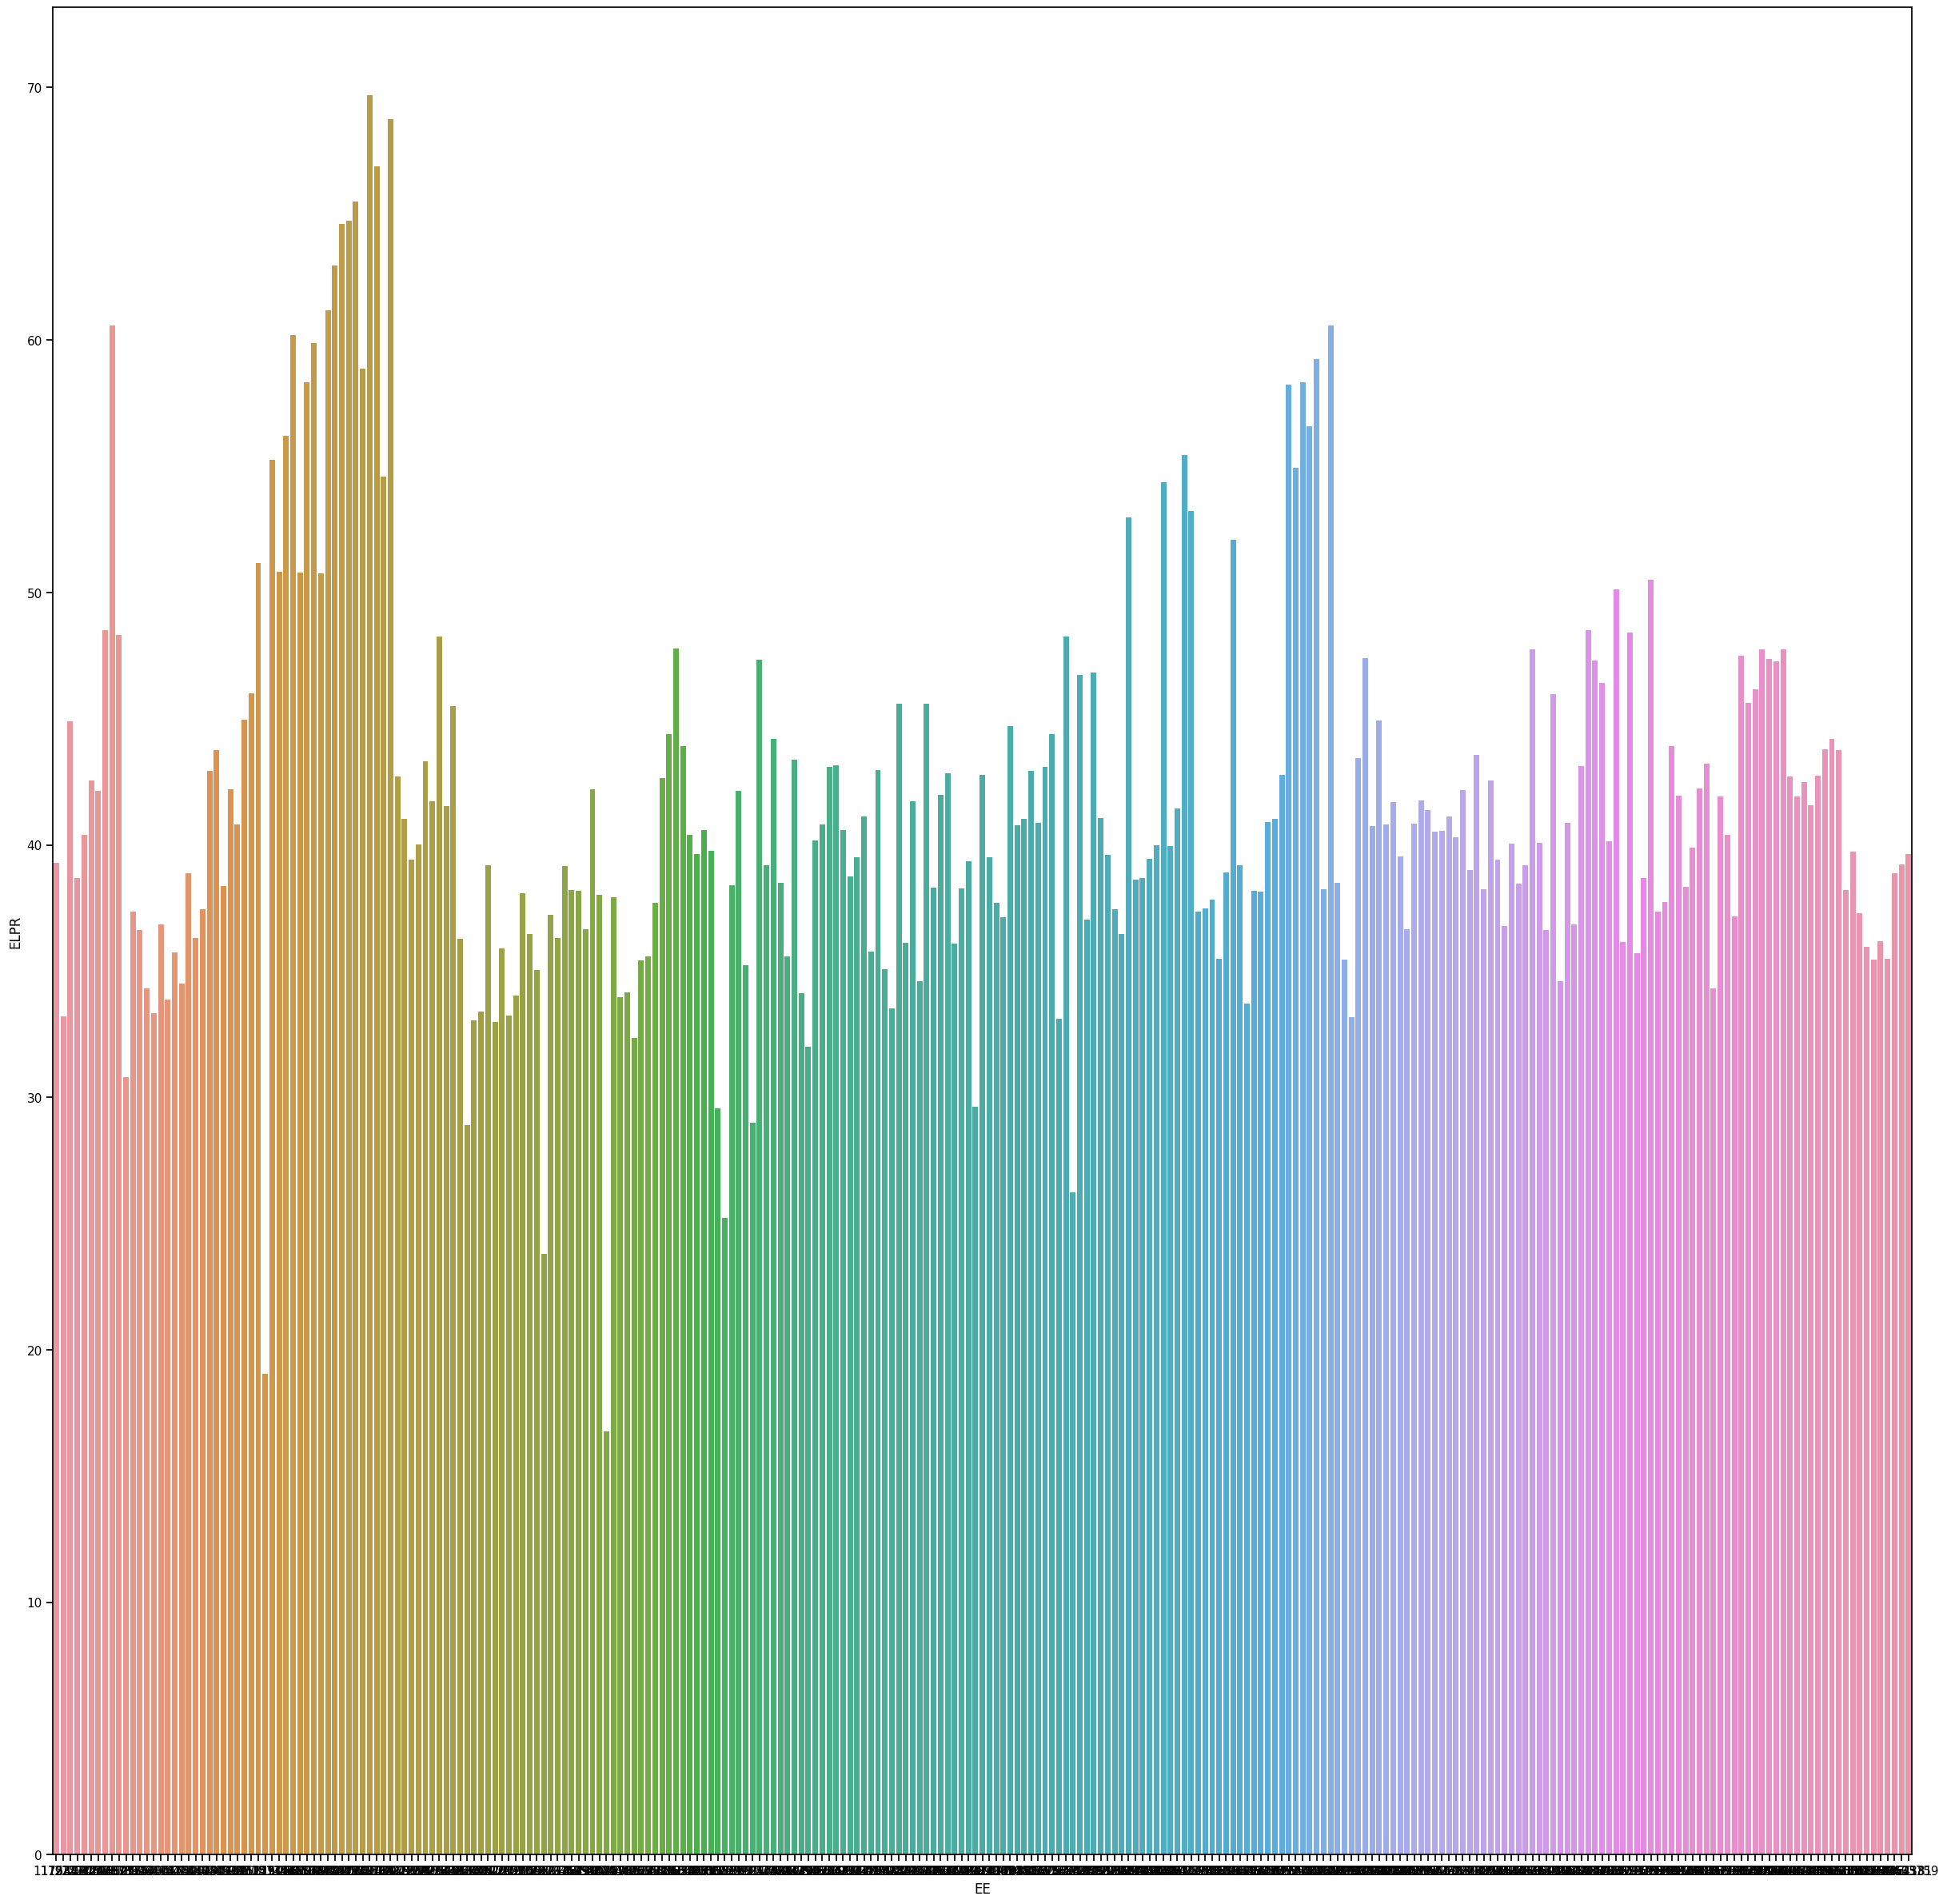

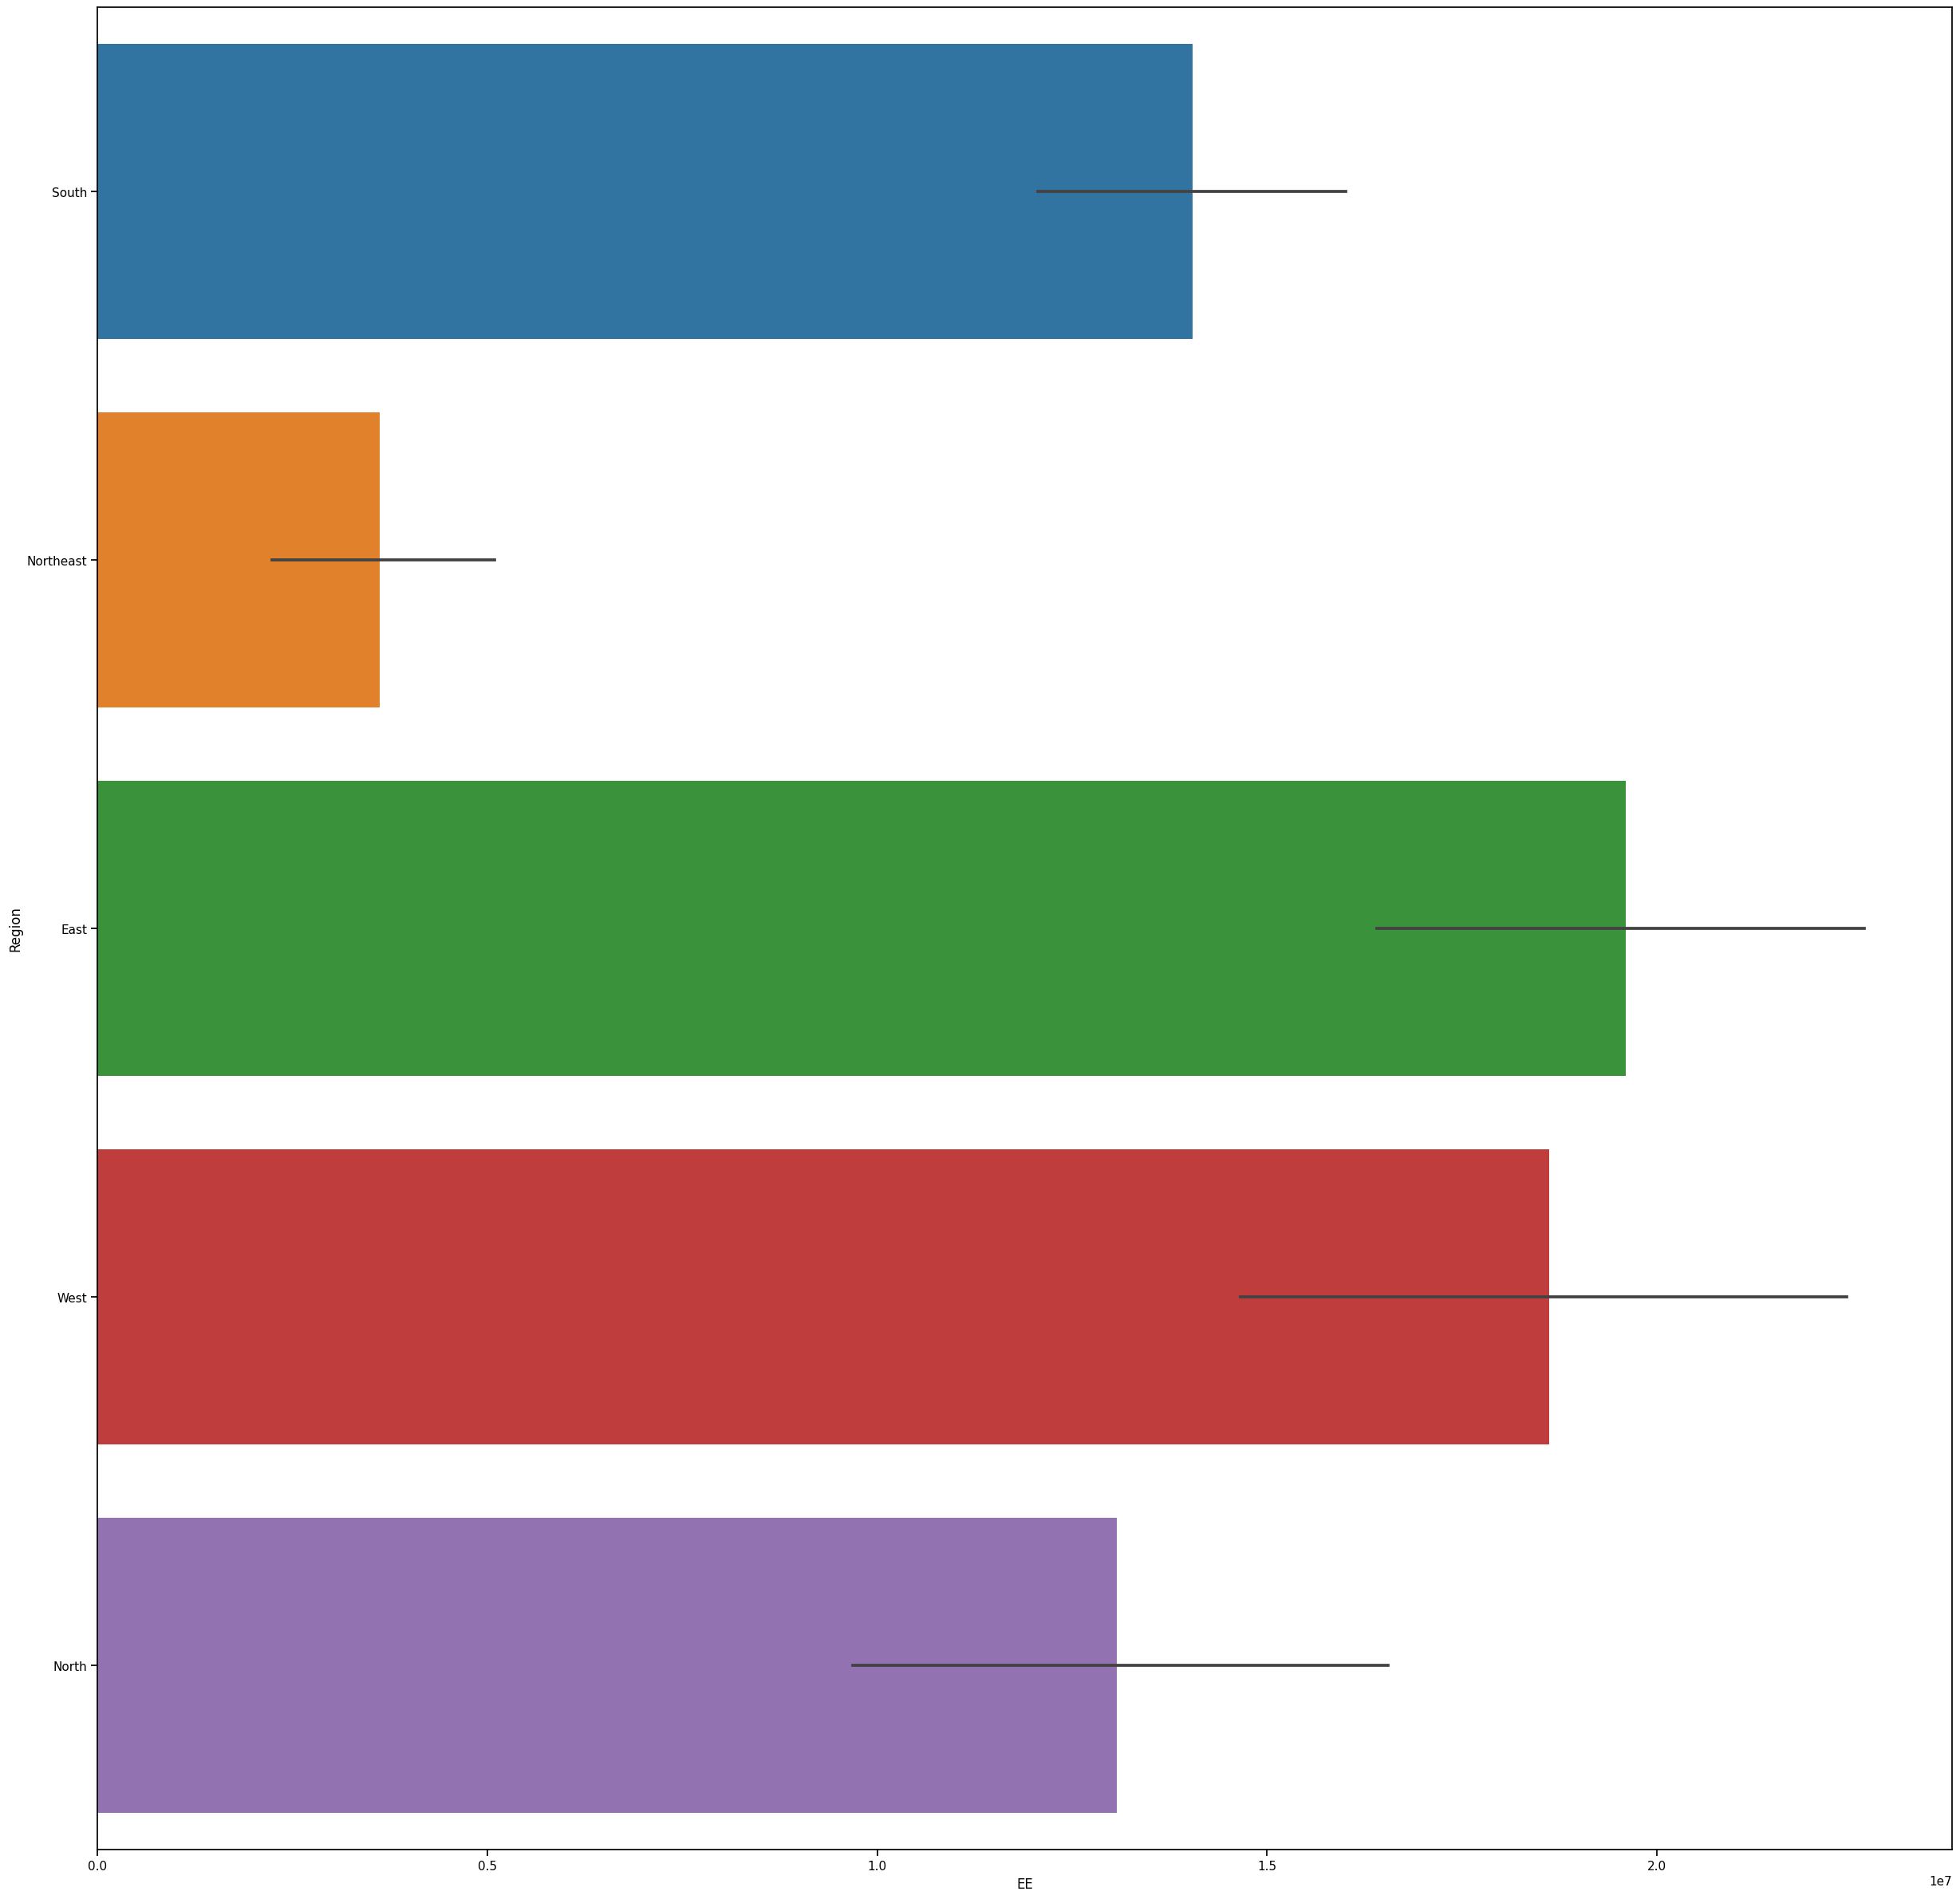

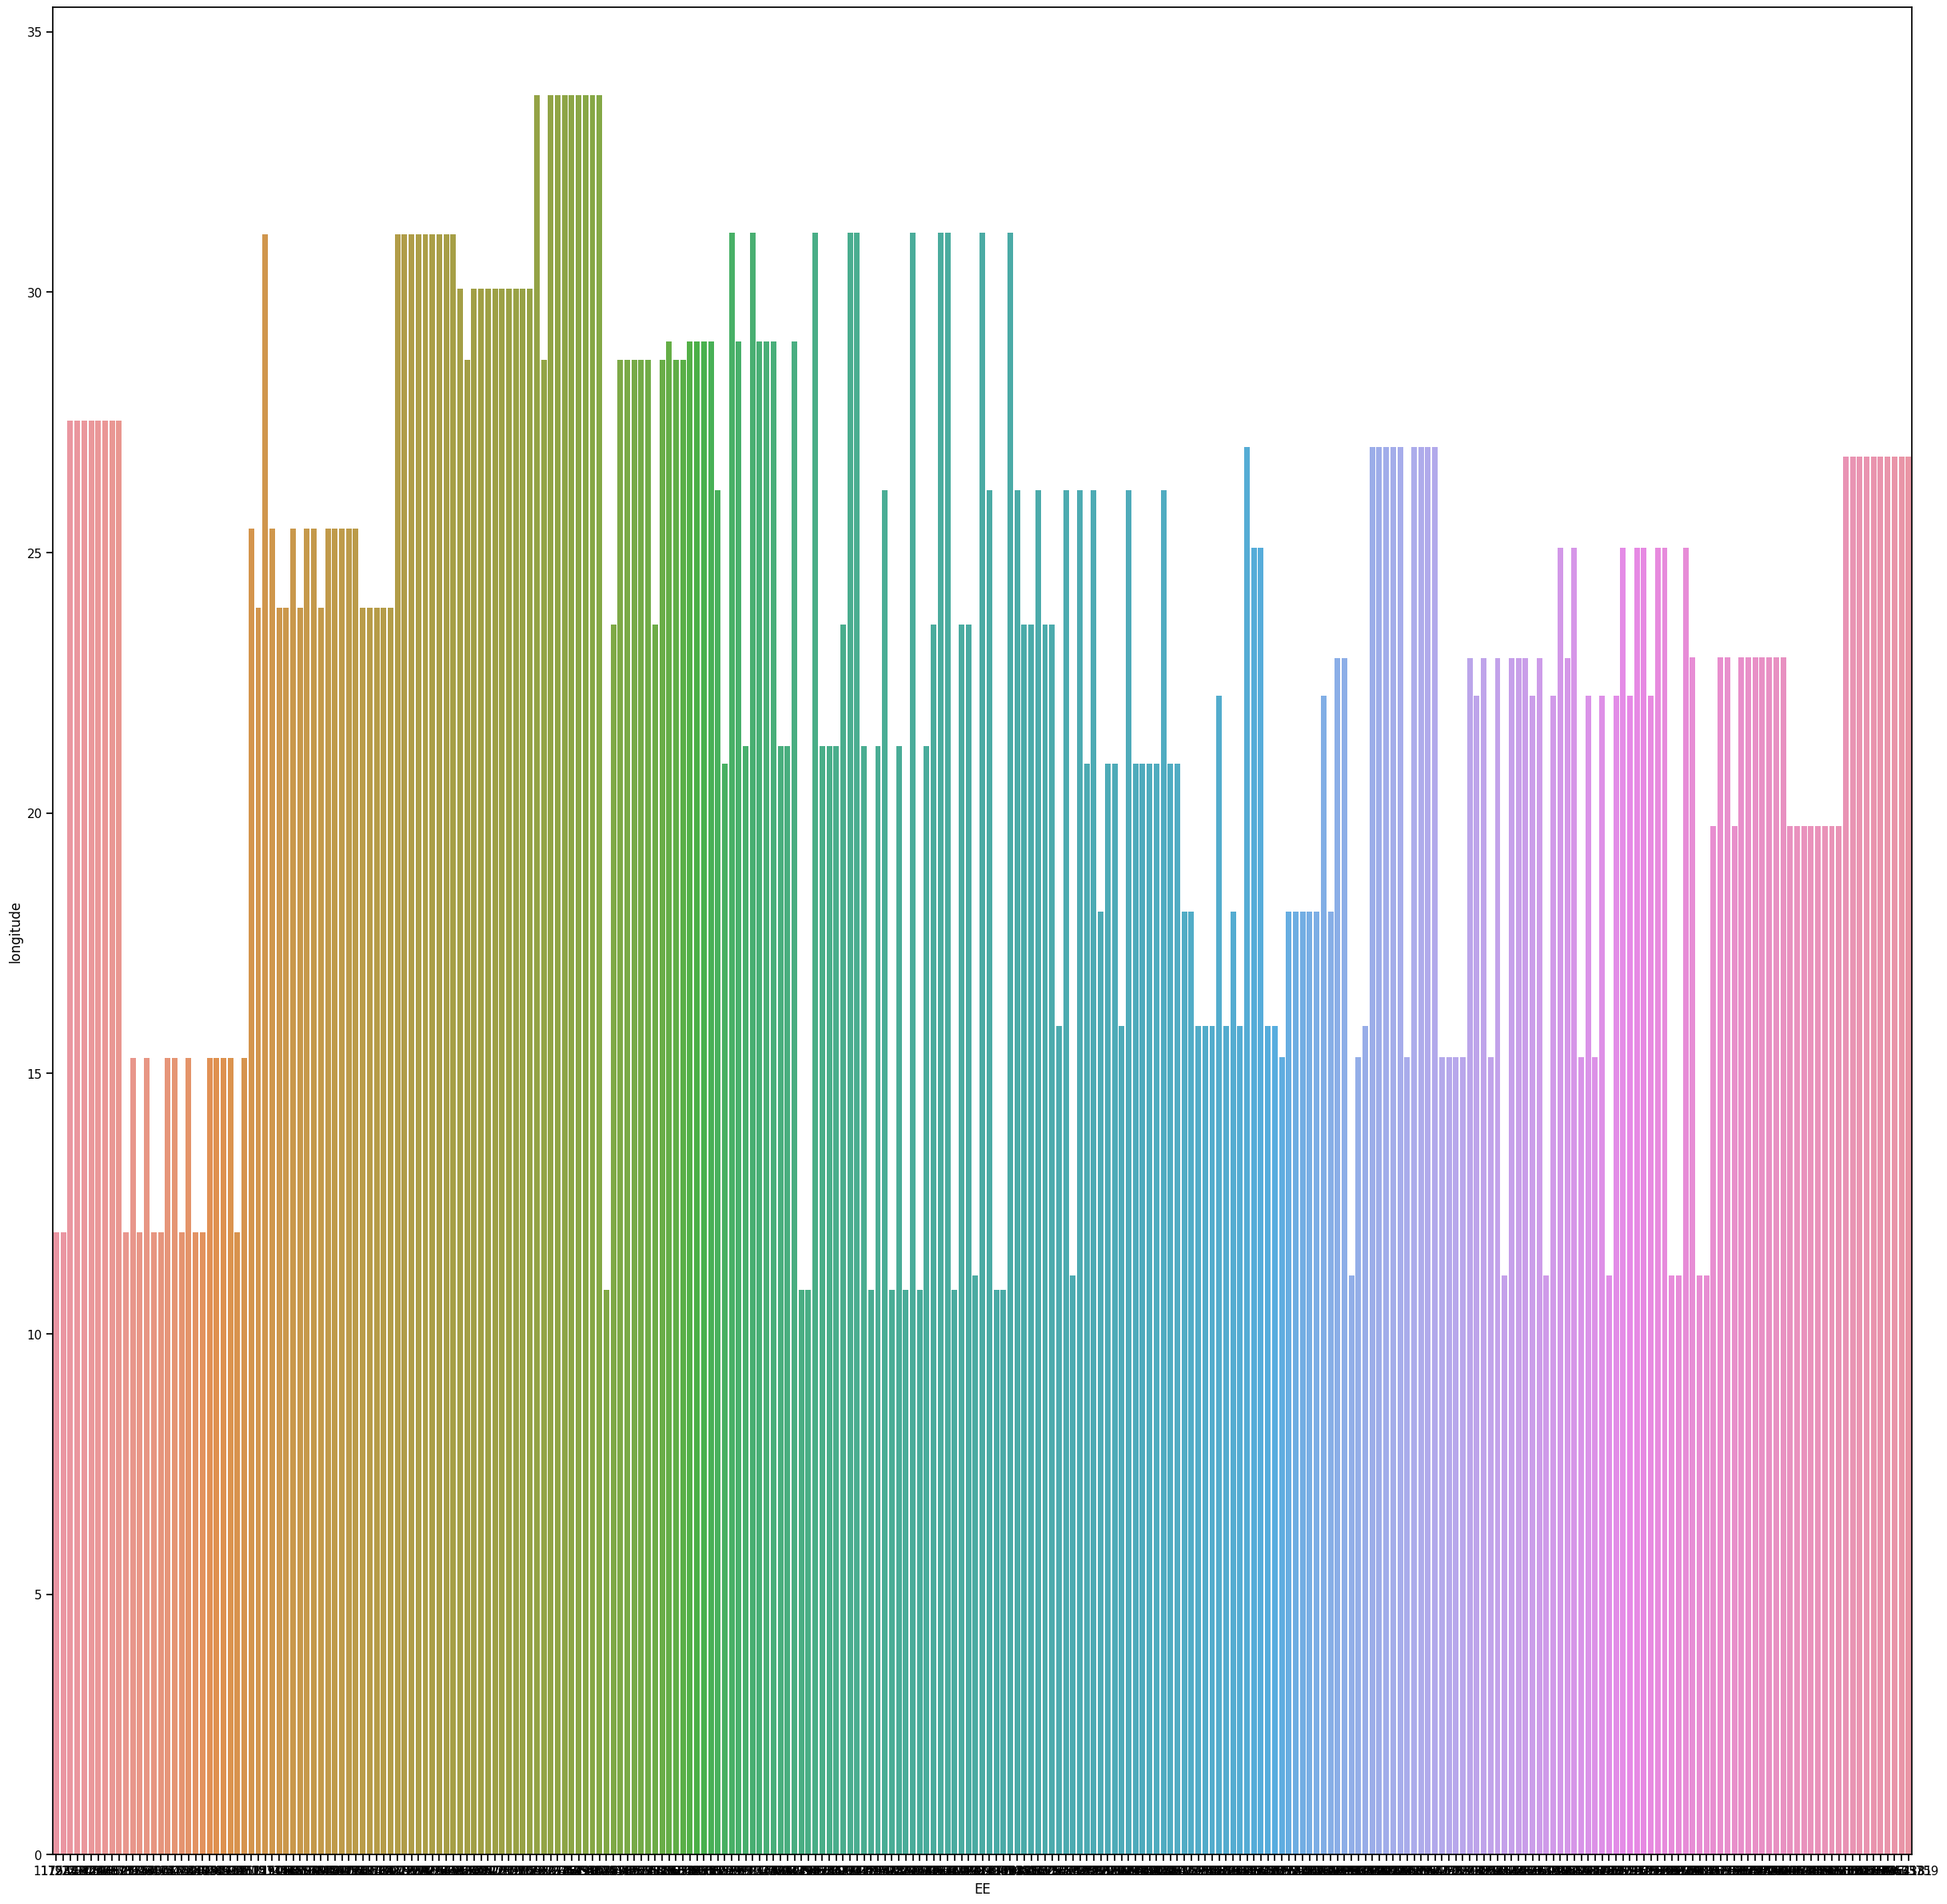

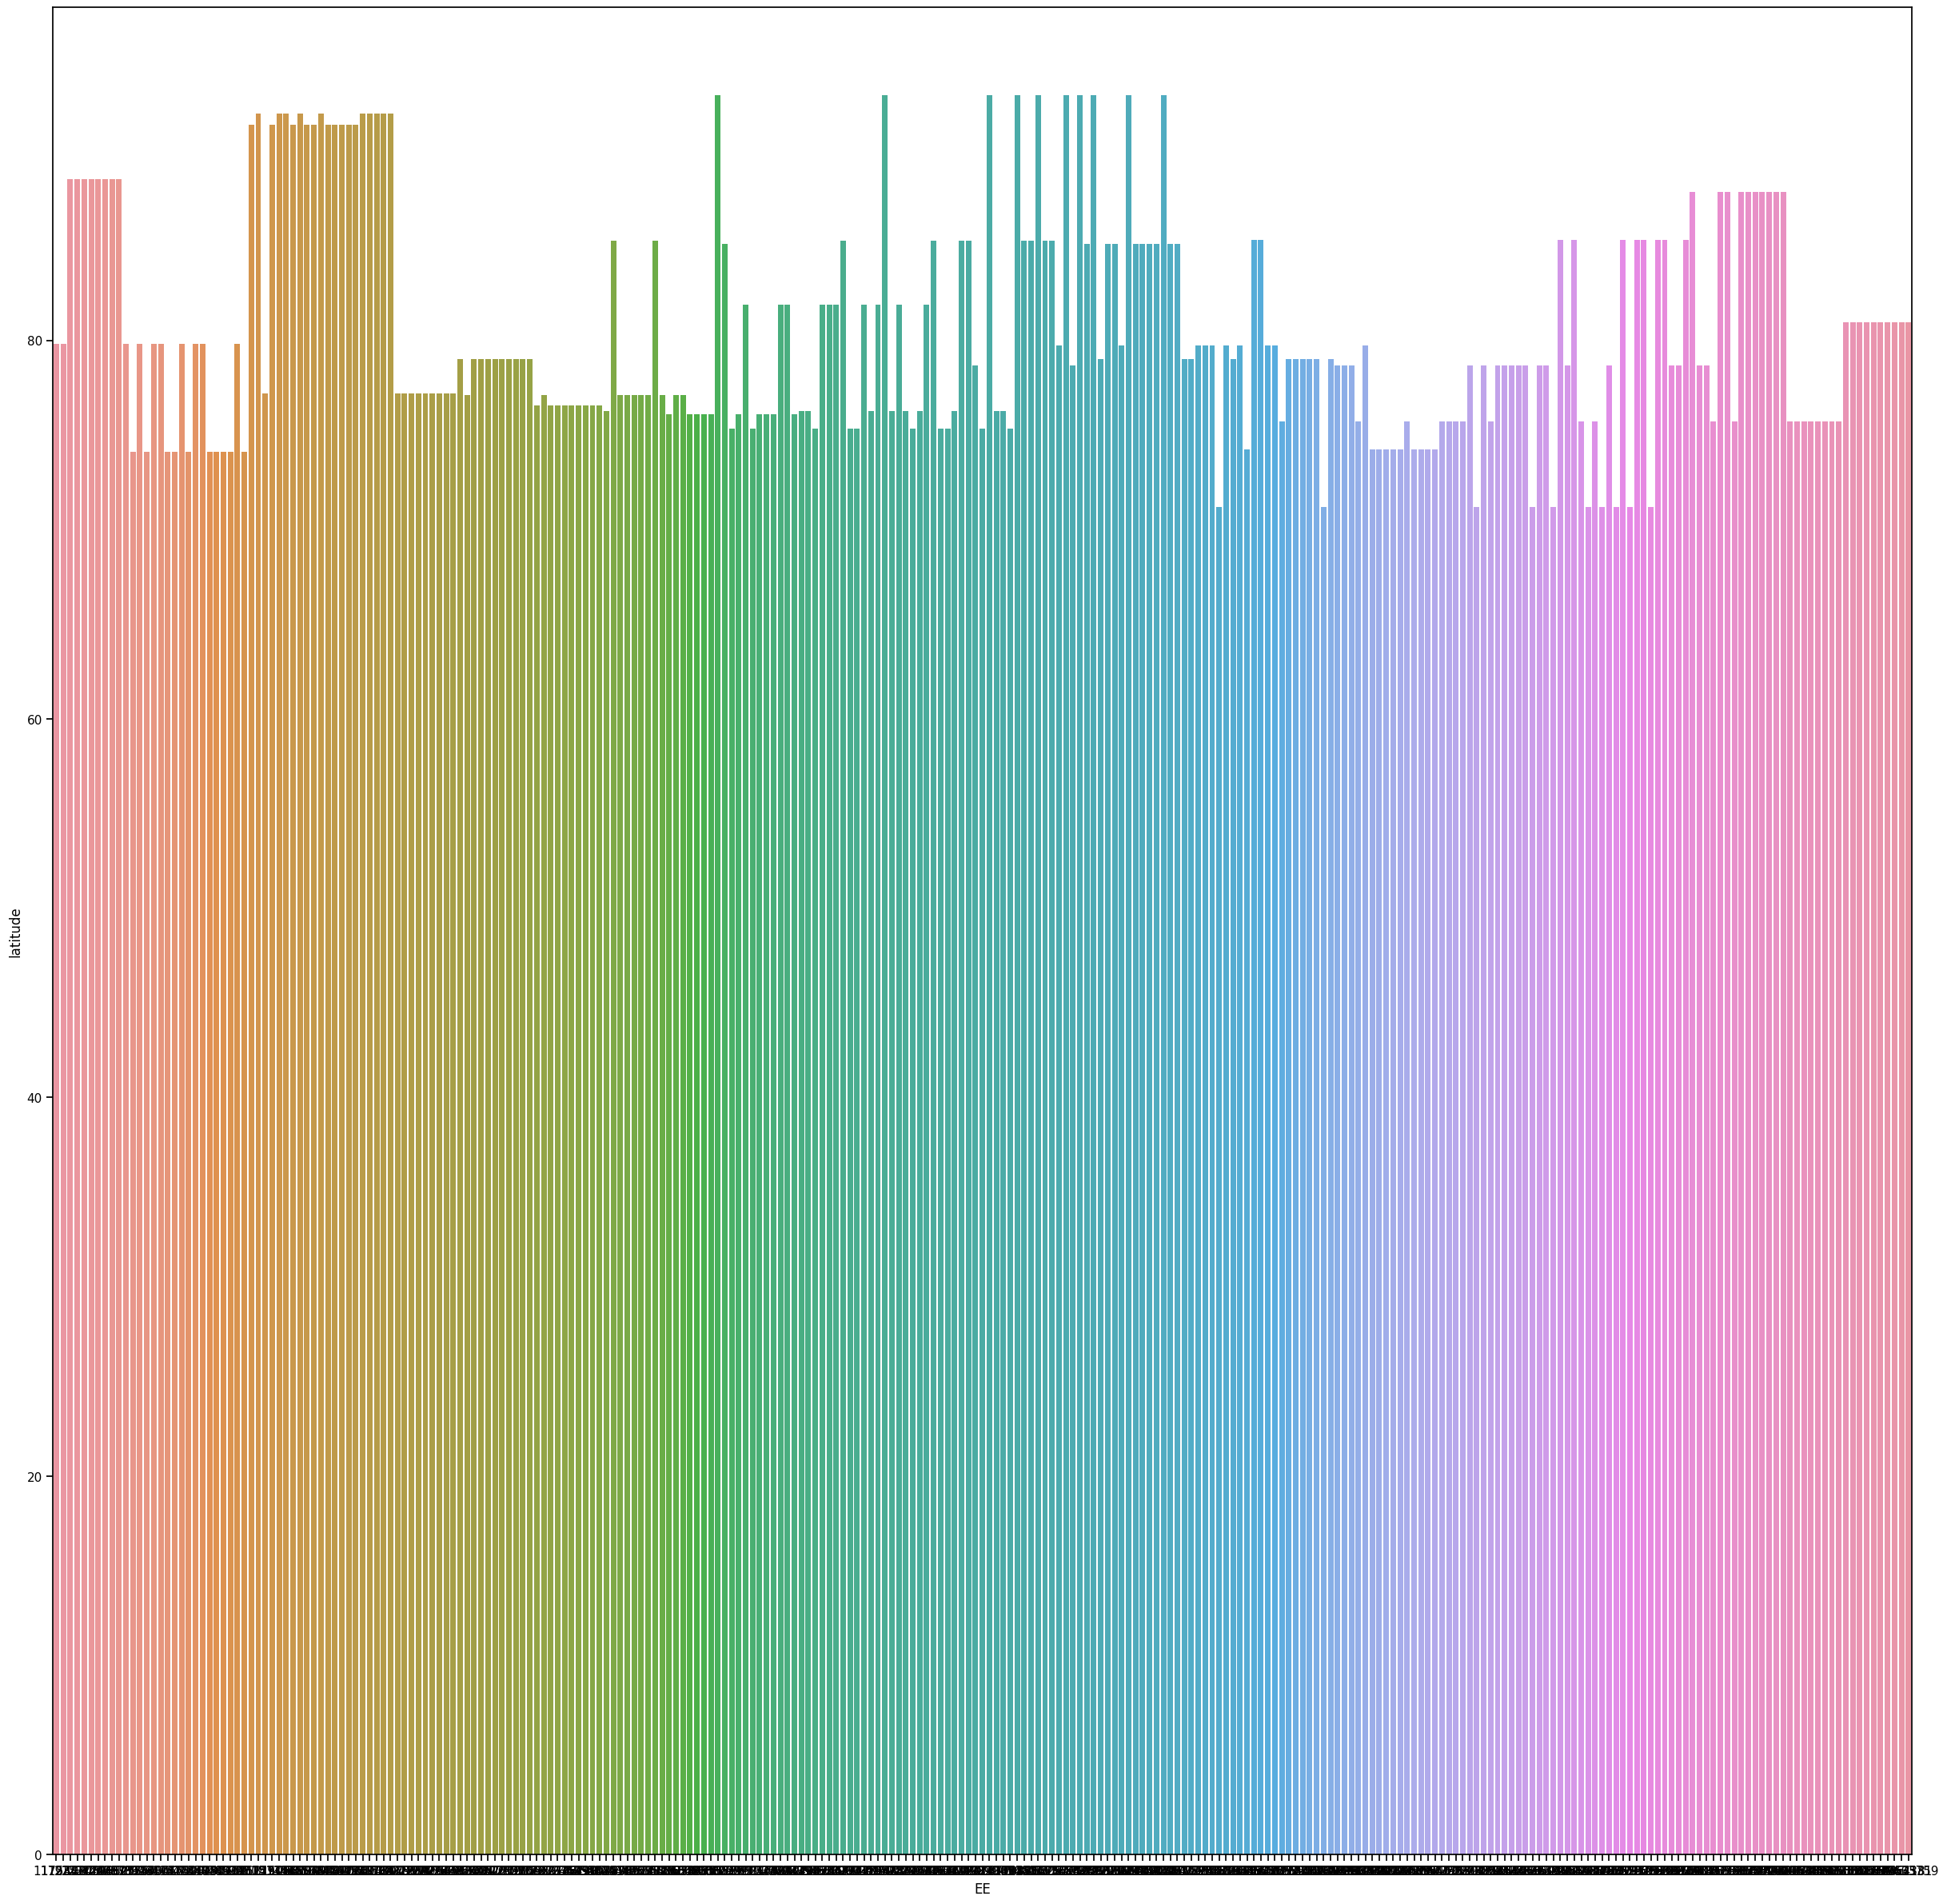

In [98]:
a=[x for x in df.columns]
for i in a:
  if i!="EE":
    plt.figure(figsize=(30,30))
    sns.barplot(x="EE",y=df[i],data=df);
    plt.show();

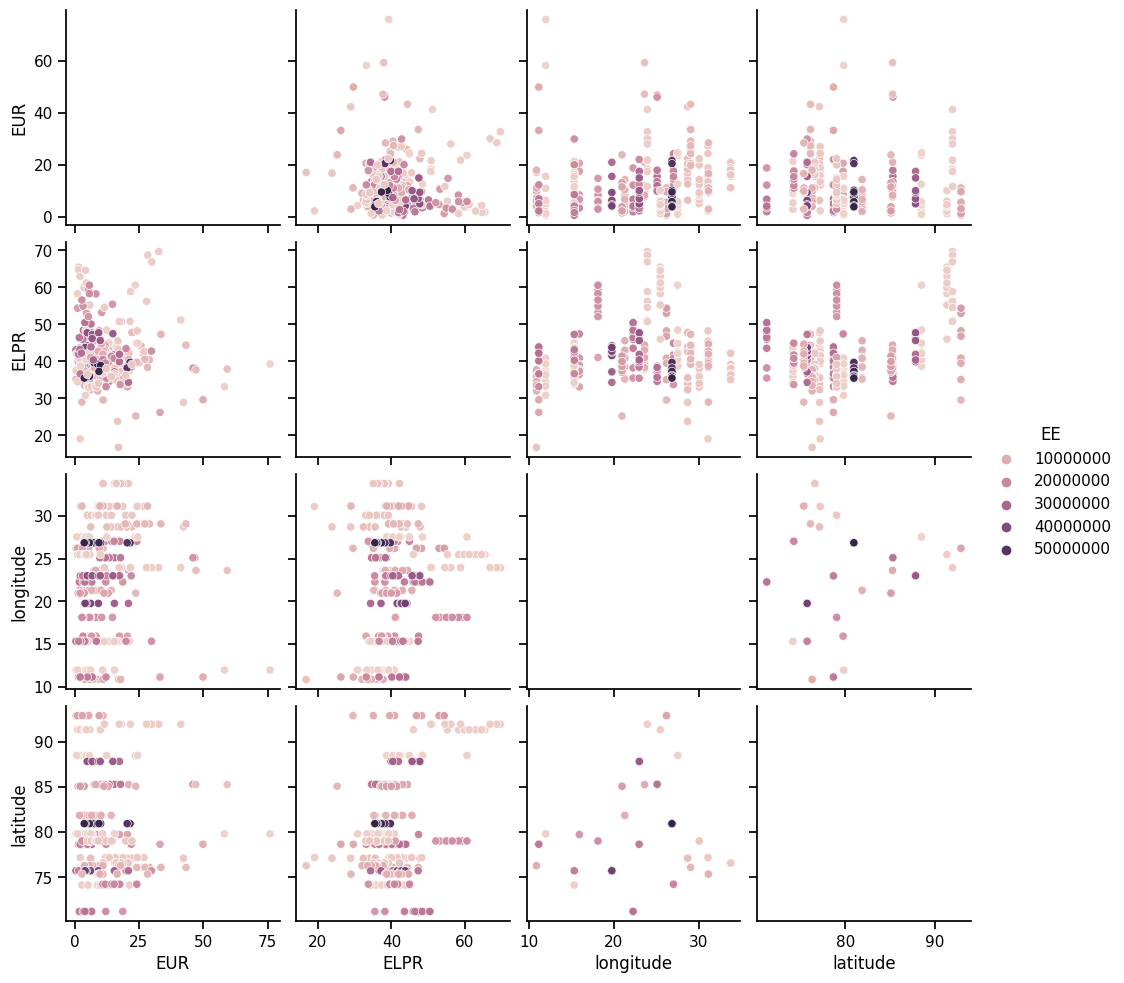

In [99]:
sns.pairplot(data=df,kind="scatter", hue="EE");
plt.show();

In [113]:
df=df[['State','Frequency', 'EUR','EE']]

In [114]:
df.head()

,State,Frequency,EUR,EE
0,0,0,5.48,16635535
1,0,0,5.83,16545652
2,0,0,5.79,15881197
3,0,0,20.51,11336911
4,0,0,17.43,12988845


In [115]:
df.columns

Index(['State', 'Frequency', 'EUR', 'EE'], dtype='object')

In [116]:
x=df.iloc[:,:-1].values

In [117]:
y=df.iloc[:,-1].values

In [118]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform((df[column]))
    df[column] = (encoded_values)

In [106]:
df.head()

,State,Frequency,EUR,Region,ELPR,EE
0,0,0,5.48,3,41.02,16635535
1,0,0,5.83,3,40.90,16545652
2,0,0,5.79,3,39.18,15881197
3,0,0,20.51,3,33.10,11336911
4,0,0,17.43,3,36.46,12988845


<Axes: ylabel='count'>

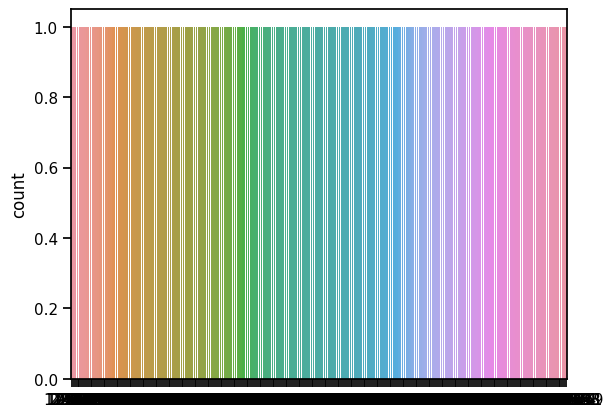

In [119]:
sns.countplot(x=y)